# **Project Name**    - Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** - Prasanth Kumar Sahu

# **Project Summary -**

Data science thrives on analytical problem-solving and sharp critical thinking. Among machine learning techniques, unsupervised learning stands out, powering key tasks like clustering, association rules, and dimensionality reduction.

This project tackles a real-world challenge: analyzing Zomato restaurant data across Indian cities to group establishments into meaningful clusters, while also diving into customer reviews for sentiment insights—uncovering whether diners felt positively or negatively about their experiences.

In today's app-driven food scene, platforms like Zomato don't just deliver meals; they create vibrant spaces for sharing honest feedback on restaurants and cafes.

Step 1: Defining the Problem
The core objective? Segment Zomato restaurants by city based on factors like cuisines and average dining costs, then gauge review sentiments to reveal customer vibes.

Step 2: Getting to Know the Data
I started by loading two key datasets: one with comprehensive restaurant details (cuisines, costs, etc.) and another capturing user ratings and reviews. Quick checks with .head() and .info() gave me a solid first look.

Step 3: Data Wrangling
Next, I cleaned things up—converting cost fields to integers, swapping odd ratings with means, and fixing inconsistencies to make the data reliable.

Step 4: Exploratory Data Analysis (EDA)
With clean data in hand, EDA unlocked hidden patterns. Visualizations revealed key relationships, like cost trends and cuisine popularity, yielding actionable insights.

Step 5: Hypothesis Testing
I tested assumptions about the data (e.g., cost vs. ratings), using p-values against a significance threshold to confirm or debunk them.

Step 6: Feature Engineering
Prepped the data for modeling by tackling nulls, outliers, scaling features, and extracting/ selecting the most relevant ones for robust performance.

Step 7: Clustering on Restaurant Data
Applied PCA for dimensionality reduction first, then tested three clustering methods:

K-Means

Agglomerative Hierarchical Clustering

DBSCAN

Optimal results showed 6 natural clusters, validated by Silhouette scores favoring K-Means and Hierarchical approaches.

Step 8: Sentiment Analysis on Reviews
For the review dataset, I preprocessed text rigorously: lowercasing, tokenization via TF-IDF, punctuation/emoji removal, stopword filtering, and lemmatization.

Tested these classifiers:

Logistic Regression

Decision Tree

Random Forest

XGBoost

KNN

Logistic Regression topped the charts with the highest AUC-ROC score. Hyperparameter tuning confirmed it's deployment-ready for sentiment predictions.

# **Data Description**

## Zomato Restaurant names and Metadata

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings

##Zomato Restaurant reviews

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

# **GitHub Link -**

# **Problem Statement**


Provide your GitHub Link here.

**Write Problem Statement Here.**

**Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [120]:

# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from datetime import datetime

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [121]:
# Load Dataset
# Loading Zomato Restaurant names and Metadata Dataset 
zomato_df=pd.read_csv('Zomato Restaurant names and Metadata.csv')

#Loading Zomato Restaurant reviews Dataset
review_df=pd.read_csv('Zomato Restaurant reviews.csv')

### Dataset First View

In [122]:
# Dataset First Look
# Zomato
zomato_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [123]:
# Review first look
review_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [124]:
# Dataset Rows & Columns count
# zomato
zomato_df.shape

(105, 6)

In [125]:
# review rows and coloumn count
review_df.shape

(10000, 7)

### Dataset Information

In [126]:
# Dataset Info
# zomato dataset info
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [127]:
# review dataset info
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [128]:
# Dataset Duplicate Value Count
# zomato duplicate value count
print(len(zomato_df[zomato_df.duplicated()]))


0


In [129]:
#review Dataset Duplicate Value Count
print(len(review_df[review_df.duplicated()]))

36


## There are some duplicated values in the review_df dataset: Total:36

In [130]:
# Finding the duplicated values in the review_df
review_df[review_df.duplicated()]

Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

#### Missing Values/Null Values

In [131]:
# Missing Values/Null Values Count
zomato_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

<Axes: >

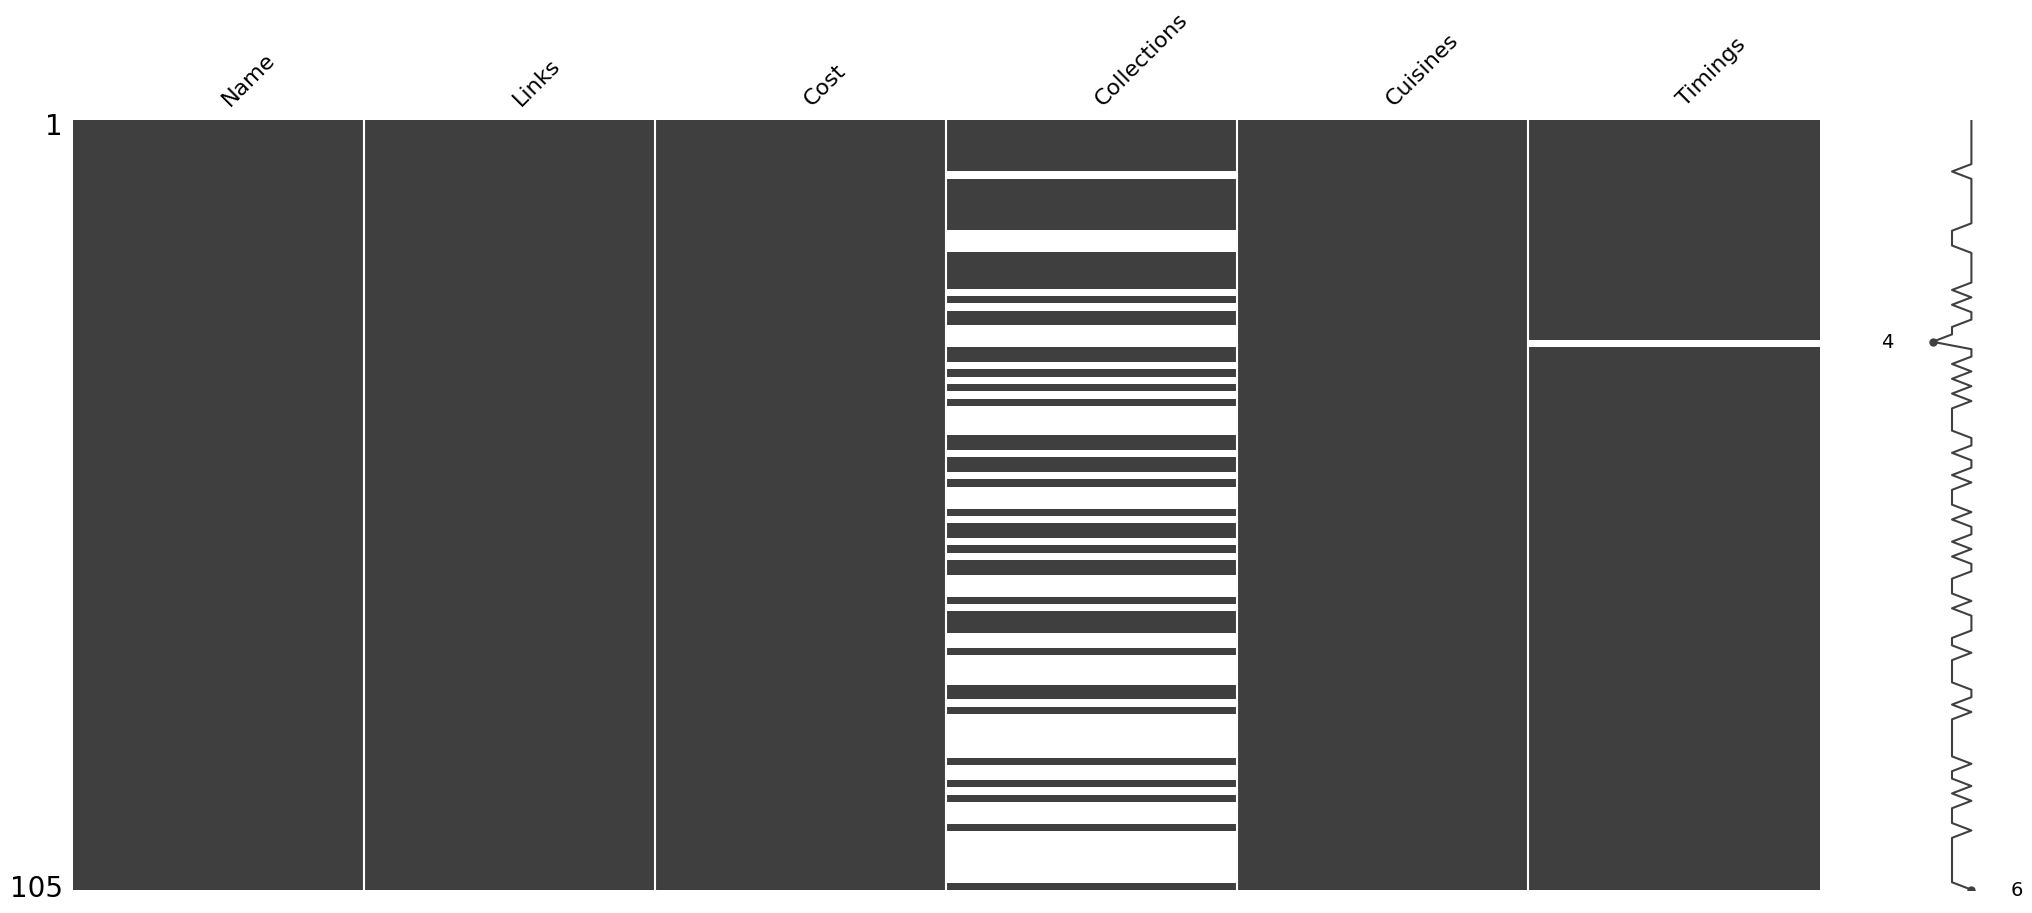

In [132]:
# Visualizing the missing values
import missingno as msno
msno.matrix(zomato_df)

In [133]:
zomato_df[zomato_df['Timings'].isnull()]

Name                                              Links Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...  900   

   Collections                            Cuisines Timings  
30         NaN  Andhra, South Indian, North Indian     NaN

### There are some missing values in the column collections a, i.e., 54 and one in Timings column( this include one of the 54 records missing in collections)

In [134]:
# Missing Values/Null Values Count in review
review_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

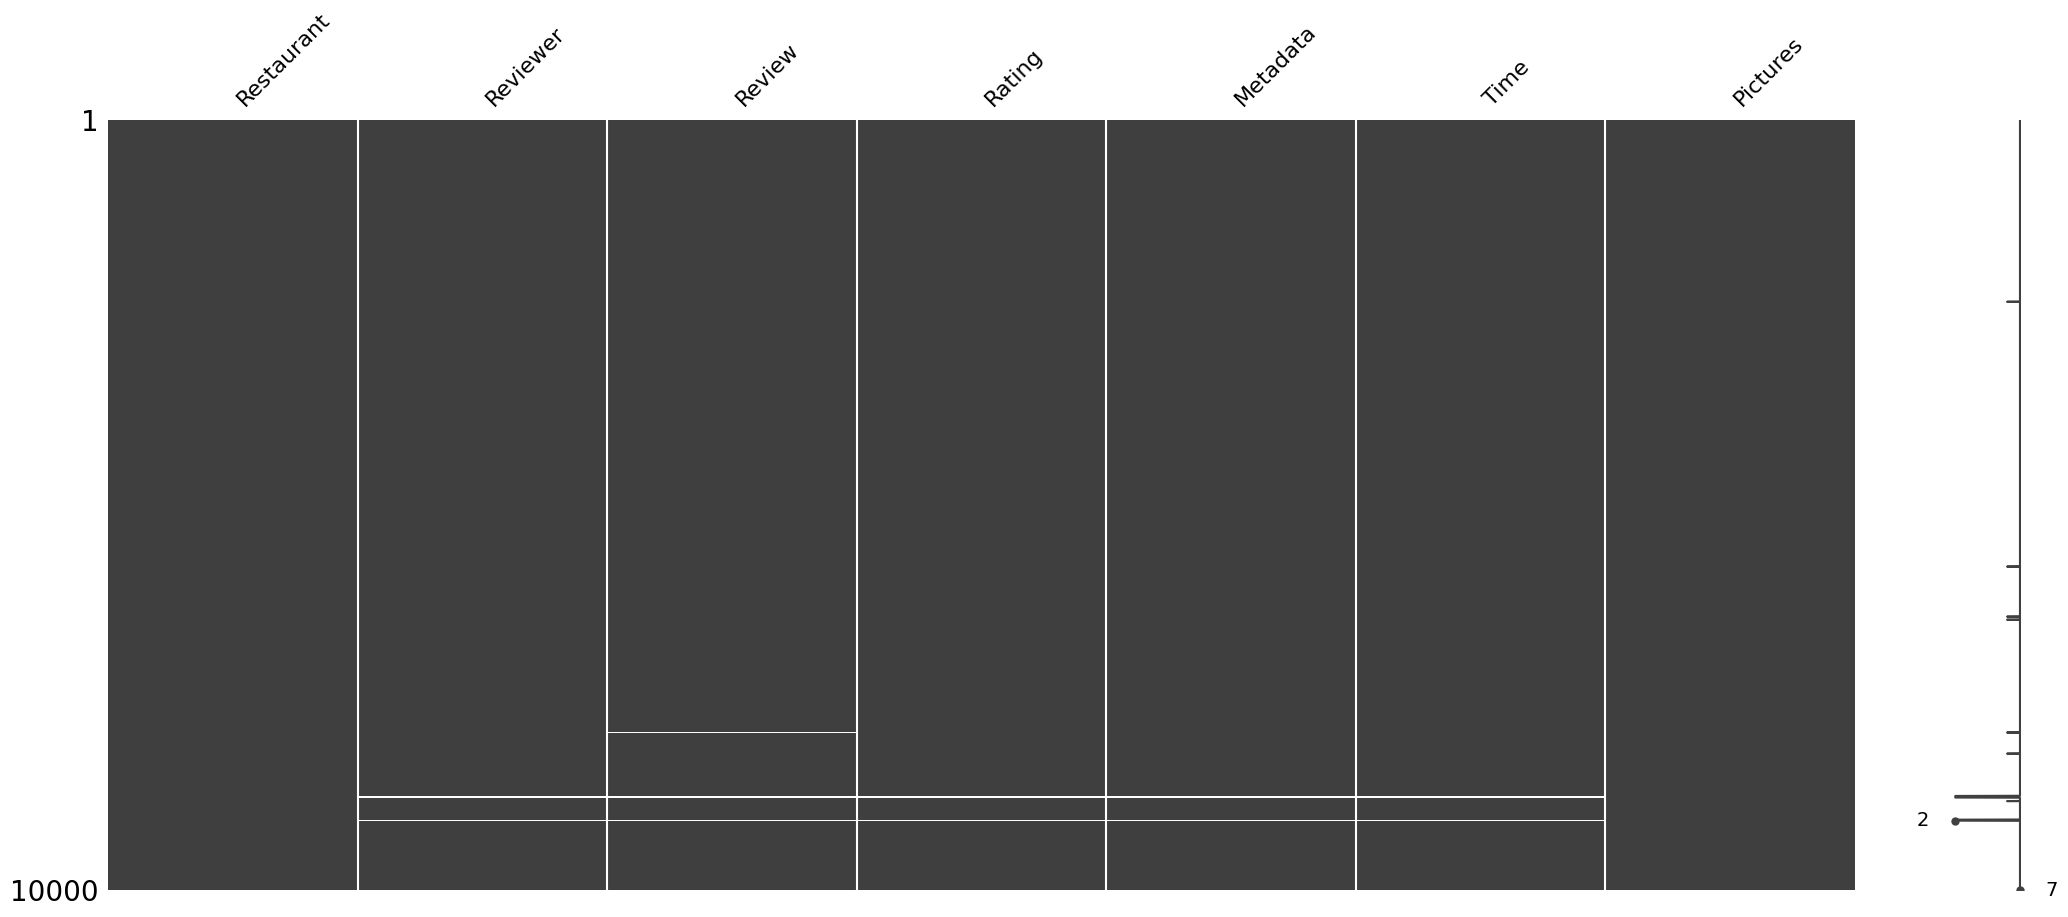

In [135]:
# Visualizing the missing values
import missingno as msno
msno.matrix(review_df)

# what did you know about your dataset

There are two datasets given:

1. Restaurant Names and metadata:
   * There are 105 records and 6 features in metadata.
   * There are missing or null values in Colllections and timings.
   * There are no duplicated values.
   * Cost must be int type but it contains comma(,) , hence its datatype is object here.
   * Timings represent the time from when the restaurant opens till end time when restaurants shut down, but it is given in the form of text, hence object datatype.

2. Reviews dataset:
   * There are 10000 records(or reviews) given with 7 features.
   * Except Name of Restaurants and Number of picture posted, There are null values.
   * There are some of the duplicated values for restaurnts which can be dropped(Since it contains null values for all the columns).
   * Rating must be integer but it contais value 'like', hence it is object datatype.


## ***2. Understanding Your Variables***

In [136]:
# Dataset Columns
zomato_df.describe(include='all').T

count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

In [137]:
# Review dataset coloumns
review_df.describe(include='all').T

count unique              top  freq    mean       std  min  25%  \
Restaurant    10000    100  Beyond Flavours   100     NaN       NaN  NaN  NaN   
Reviewer       9962   7446      Parijat Ray    13     NaN       NaN  NaN  NaN   
Review         9955   9364             good   237     NaN       NaN  NaN  NaN   
Rating         9962     10                5  3832     NaN       NaN  NaN  NaN   
Metadata       9962   2477         1 Review   919     NaN       NaN  NaN  NaN   
Time           9962   9782  7/29/2018 20:34     3     NaN       NaN  NaN  NaN   
Pictures    10000.0    NaN              NaN   NaN  0.7486  2.570381  0.0  0.0   

            50%  75%   max  
Restaurant  NaN  NaN   NaN  
Reviewer    NaN  NaN   NaN  
Review      NaN  NaN   NaN  
Rating      NaN  NaN   NaN  
Metadata    NaN  NaN   NaN  
Time        NaN  NaN   NaN  
Pictures    0.0  0.0  64.0

In [138]:
# Dataset Describe

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [139]:
# Check Unique Values for each variable.
# Check Unique Values for each variable in zomato metada.csv file.
for col in zomato_df.columns:
  print("Column:",col,"\n",zomato_df[col].nunique())
  print('--'*70)

Column: Name 
 105
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Links 
 105
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Cost 
 29
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Collections 
 42
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Cuisines 
 92
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Timings 
 77
--------------------------------------------------------------------------------------------------------------------------------------------


In [140]:
# Check Unique Values for each variable in review.csv file
for col in review_df.columns:
  print("Column:",col,"\n",review_df[col].nunique())
  print('--'*70)

Column: Restaurant 
 100
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Reviewer 
 7446
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Review 
 9364
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Rating 
 10
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Metadata 
 2477
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Time 
 9782
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Pictures 
 

* There are total 100 restaurants whose reviews are given.
* Ttotal of 7446 reviewers have given their review on restaurants.
* Metadata contains number of followers and reviews on restaurants.
* Pictures posted by customers has 36 unique values.
* Rating may vary from 0 to 5. Let's check for it's unique values.

In [141]:
# Check Unique Values for rating variable.
print("Column:",'Rating',"\n",review_df['Rating'].unique())  

Column: Rating 
 ['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like' nan]


The ratings are given by customer as 1,1.5,2,2.5,...5,'like', 'nan' while there are some other missing values. 
* We can replace the missing value with median of that particular restaurant.
* Also We know that 'like' is not a rating and replacing it with rating 4 (Because rating 4 can be considered as people like the taste)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [142]:
# Dropping the duplicate values in reviews_df
review_df.drop_duplicates(keep=False,inplace=True)

In [143]:
# Replace Rating 'Like' with rating 4
review_df['Rating']=review_df['Rating'].str.replace("Like",'4').astype('float')

# Write your code to make your dataset analysis ready.

# DROPPING THE NULL VALUES IN REVIEW COLOUMN

In [144]:
review_df[['No_of_reviews','Followers']] = review_df['Metadata'].str.extractall(r'(\d+(?:,\d+)?)').unstack().astype(float).fillna(0).astype(int)
review_df


Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                          Metadata             Time  Pictures  No_of_reviews  \
0           1 Review , 2 Followers  5/25/2019 15:54         0              1   
1          3 Reviews , 2 Followers  5/25/2019 14:20         0              3   
2          2 Reviews , 3 Followers  5/24/2019 22:54         0              2   
3            1 Review , 1 Follower  5/24/2019 22:11         0              1   
4          3 Reviews , 2 Followers  5/24/2019 21:37         0              3   
...                            ...              ...       ...            ...   
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0             53   
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0              2   
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3             65   
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0             13   
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6            472   

      Followers  
0             2  
1             2  
2             3  
3             1  
4             2  
...         ...  
9995         54  
9996         53  
9997        423  
9998        144  
9999       1302  

[9962 rows x 9 columns]

In [145]:
# Filling the null values of Followes with 0
review_df['Followers'].fillna(0,inplace=True)

In [146]:
# Converting Time to date time and extracting Hour and year 
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Year']=pd.DatetimeIndex(review_df['Time']).year
review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour  

In [147]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9962 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9962 non-null   object        
 1   Reviewer       9962 non-null   object        
 2   Review         9955 non-null   object        
 3   Rating         9962 non-null   float64       
 4   Metadata       9962 non-null   object        
 5   Time           9962 non-null   datetime64[ns]
 6   Pictures       9962 non-null   int64         
 7   No_of_reviews  9962 non-null   int64         
 8   Followers      9962 non-null   int64         
 9   Year           9962 non-null   int32         
 10  Hour           9962 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(3), object(4)
memory usage: 856.1+ KB


In [148]:
# 2. Now executing the same process for zomato_df dataset
# Renaming the zomato_df dataset column name
zomato_df.rename(columns={'Name':'Restaurant'},inplace=True)

In [149]:
# checking values for cost
zomato_df['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [150]:
# Removing ',' from Cost in hotel
zomato_df['Cost']=zomato_df['Cost'].str.replace(",","").astype("int64")

In [151]:
# Get the function for number of cuisine in a zomato_df
def get_no_of_cuisine(cuisine):
  Cuisine_list=list(str(cuisine).split(','))
  return len(Cuisine_list)

# Create a new column with no of cuisine in zomato_df dataframe
zomato_df['No_of_cuisine']=zomato_df['Cuisines'].apply(get_no_of_cuisine)

In [152]:
# Create a new column for average rating in hotel dataset
Avg_rating = review_df.groupby(by='Restaurant',as_index='False')['Rating'].mean().reset_index()
Avg_rating.rename(columns={'Rating':'Avg_rating'},inplace = True)
Avg_rating

Restaurant  Avg_rating
0                       10 Downing Street        3.80
1                                13 Dhaba        3.48
2          3B's - Buddies, Bar & Barbecue        4.76
3               AB's - Absolute Barbecues        4.88
4                       Absolute Sizzlers        3.62
..                                    ...         ...
95             Urban Asia - Kitchen & Bar        3.65
96  Yum Yum Tree - The Arabian Food Court        3.56
97        Zega - Sheraton Hyderabad Hotel        4.45
98               Zing's Northeast Kitchen        3.65
99                                eat.fit        3.20

[100 rows x 2 columns]

In [153]:
# Now merging the avg_rating with zomato_df dataset
zomato_df = zomato_df.merge(Avg_rating,on = 'Restaurant')

In [154]:
# Let's merge the two dataset
df = zomato_df.merge(review_df, on = 'Restaurant')
df.shape

(9962, 18)

### What all manipulations have you done and insights you found?

Answer Here.
For the review_df dataset:
* Dropped the duplicate rows (since it contained null values)
* Changed the Rating - Like to numeric value and changed it datatype ( Since it represents the ordinal data)
* Extracted No_of_review and followers from Metadata column and filled the null values of followes with 0.
* Cahnged the time datatype to datetime and extracted Year and Hour from it.

For the zomato_df dataset:
* Rename the Column 'Name' to 'Restaurant' for the sake of simplicity.
* Removed special character(,) from Cost and changed its datatype to integer.
* Get the number of cuisines.
* Merged the average rating in hotel dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: ylabel='Cost'>

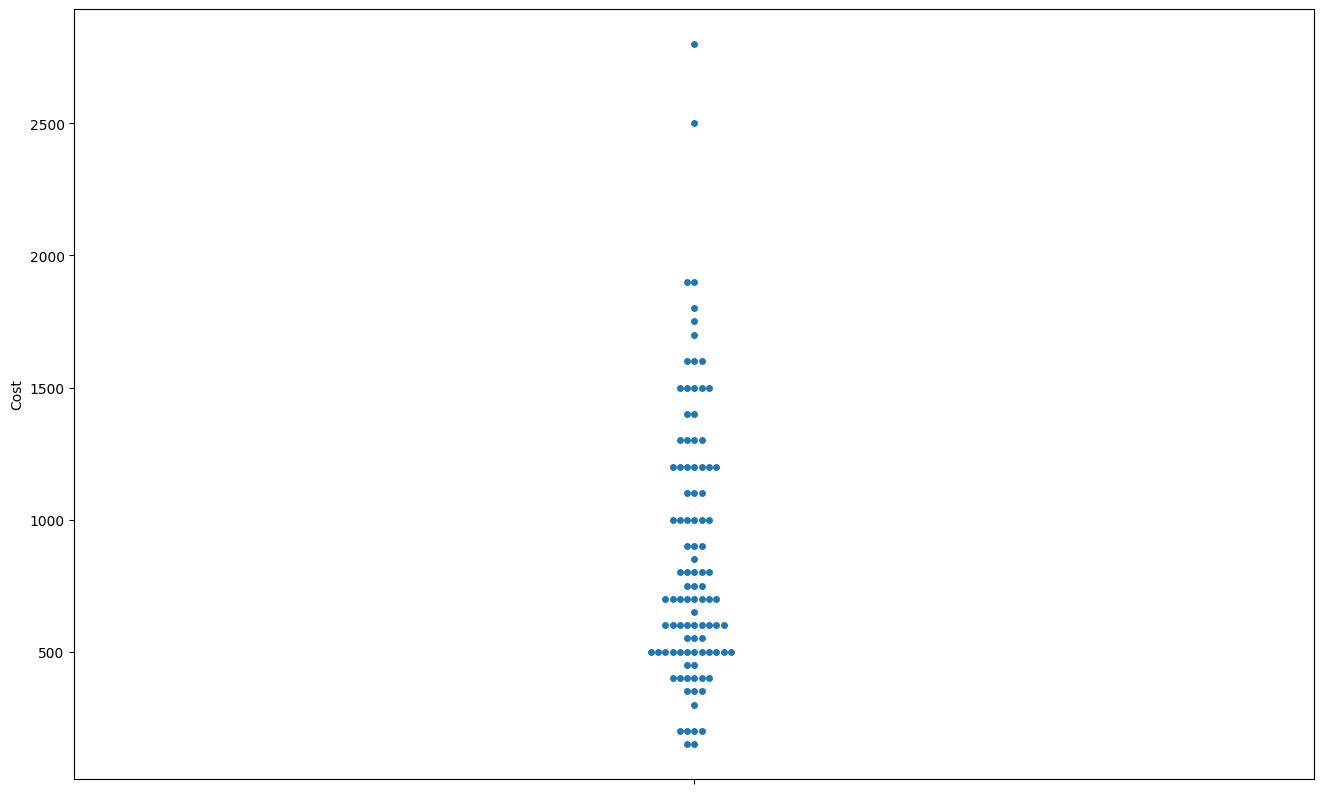

In [155]:
# Chart - 1 visualization code

# Let's now plot the swarmplot to see the variation in price 
sns.swarmplot(zomato_df['Cost'])



##### 1. Why did you pick the specific chart?


To find the cost of restaurants.
Here we can see that there are two dots which are near to cost 2500. So i analyzed that the highest cost of a restaurant can go upto 2500

##### 2. What is/are the insight(s) found from the chart?

Average cost per person is 500 and there are very few restaurants which come close to 2500rs.

##### 3. Will the gained insights help creating a positive business impact?
yes absolutely, the gained insight clearly shows that there are only few restaurants which maintain the cost of 2500rs 

Answer Here

#### Chart - 2

In [156]:
# Chart - 2 visualization code
#Find out the costliest restaurants
costly_res=zomato_df[['Restaurant','Cost']].groupby('Restaurant',as_index=False).mean().sort_values(by='Cost',ascending=False).head(10).reset_index(drop=True)
costly_res

Restaurant    Cost
0               Collage - Hyatt Hyderabad Gachibowli  2800.0
1                   Feast - Sheraton Hyderabad Hotel  2500.0
2                                  10 Downing Street  1900.0
3  Jonathan's Kitchen - Holiday Inn Express & Suites  1900.0
4            Cascade - Radisson Hyderabad Hitec City  1800.0
5                    Zega - Sheraton Hyderabad Hotel  1750.0
6              Mazzo - Marriott Executive Apartments  1700.0
7                                             B-Dubs  1600.0
8                                       Arena Eleven  1600.0
9                                    Barbeque Nation  1600.0

In [157]:
#Finding the cheapest restaurants
cheapest_res = zomato_df[['Restaurant','Cost']].groupby('Restaurant',as_index=False).mean().sort_values(by='Cost',ascending=True).head(10).reset_index(drop=True)
cheapest_res

Restaurant   Cost
0                           Amul  150.0
1            Mohammedia Shawarma  150.0
2             Hunger Maggi Point  200.0
3                      KS Bakers  200.0
4                  Momos Delight  200.0
5                 Asian Meal Box  200.0
6       Shah Ghouse Spl Shawarma  300.0
7                    Cream Stone  350.0
8  The Old Madras Baking Company  350.0
9                       Tempteys  350.0

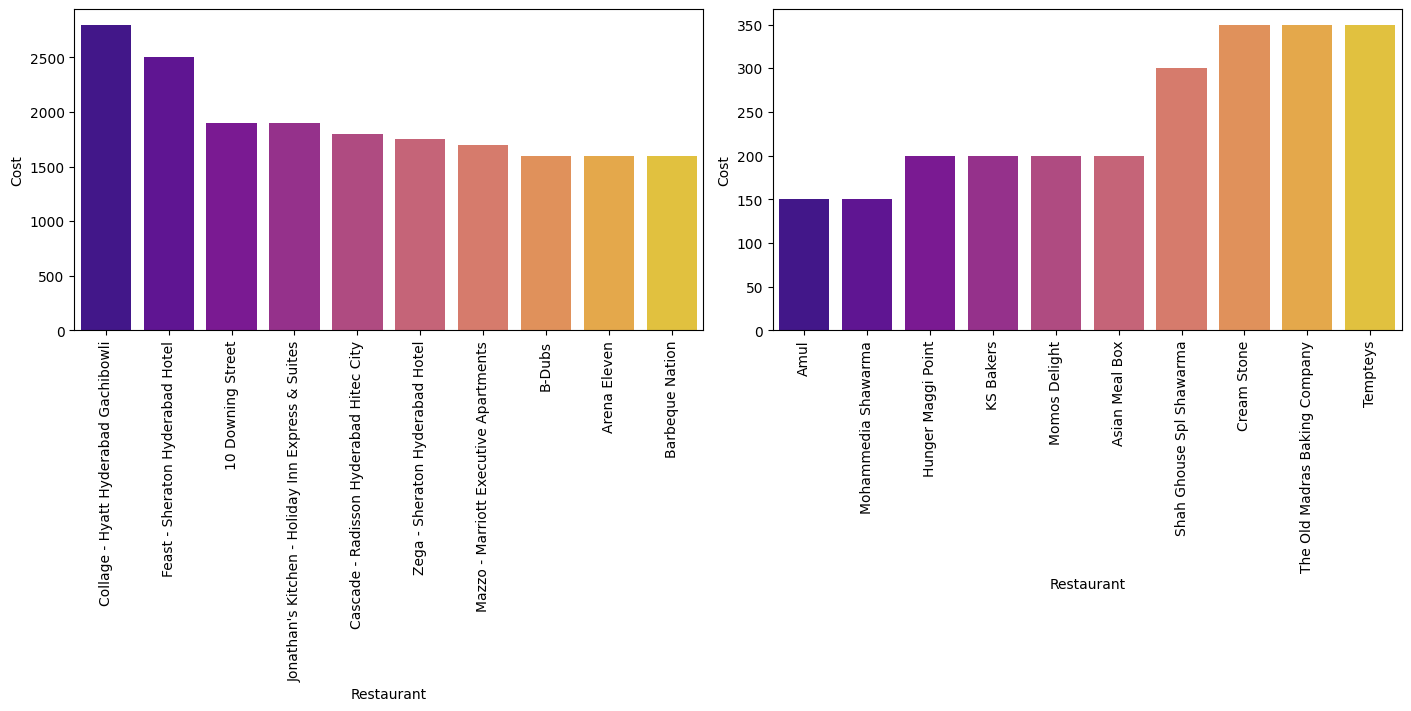

In [158]:
#visualisation of the most expensive and cheapest restaurant
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

#costliest restaurant
a=sns.barplot(x = 'Restaurant',y = 'Cost',data = costly_res,ax = axes[0],palette = 'plasma')
a.set_xticklabels(labels=costly_res['Restaurant'].to_list(),rotation=90)

#cheapest restaurant
b=sns.barplot(x = 'Restaurant',y = 'Cost',data = cheapest_res,ax = axes[1],palette = 'plasma')
b.set_xticklabels(labels=cheapest_res['Restaurant'].to_list(),rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

The barplots clearly shows the differentiation between expensive and cheapest restaurants

##### 2. What is/are the insight(s) found from the chart?

Expensive Restaurants : Here "Collage - Hyatt Hyderabad Gachibowli" is the most expensive restaurant whose price is rupees 2800 which is followed by "Feast - Sheraton Hyderabad Hotel" whose price is rupees 2500. Other expensive restaurants can be seen from the graph and table.

Cheap Restaurants : Here "Mohammedia Shawarma" and "Amul" is the cheapest restaurant where we can get the dish with the minimum price of rupees 150 , which is followed by "Sweet Basket", "KS Bakers", "Momos Delight etc whose price is rupees 200 . 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
From this insight we get to know about the restaurants which has dishes containing lower prices. So a middle waged person can afford it easily. Hence this can be benefitial for that particular restaurant as well as Zomato as more people will order food from Zomato.

Also we get to know about the most expensive restaurant, which led to negative growth of that restaurants as fear of losing money if they do not get the taste they want by customers. 

#### Chart - 3

(np.float64(-0.5), np.float64(1999.5), np.float64(1999.5), np.float64(-0.5))

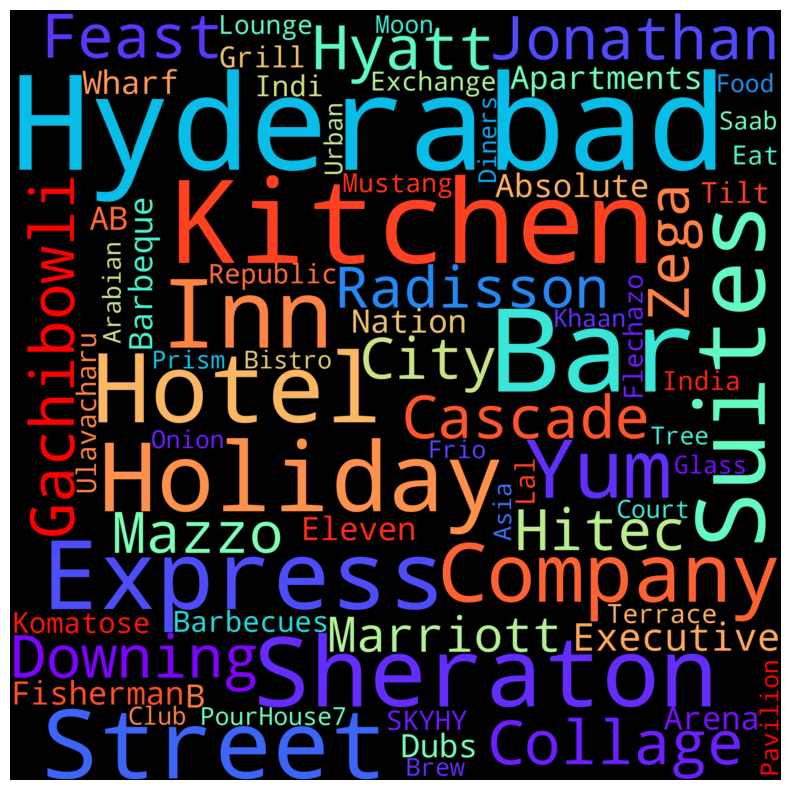

In [159]:
# Chart - 3 visualization code
#CREATING WORDCLOUD FOR EXPENSIVE RESTAURANT
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
text = " ".join(name for name in zomato_df.sort_values('Cost',ascending=False).Restaurant[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear');
plt.axis("off")

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

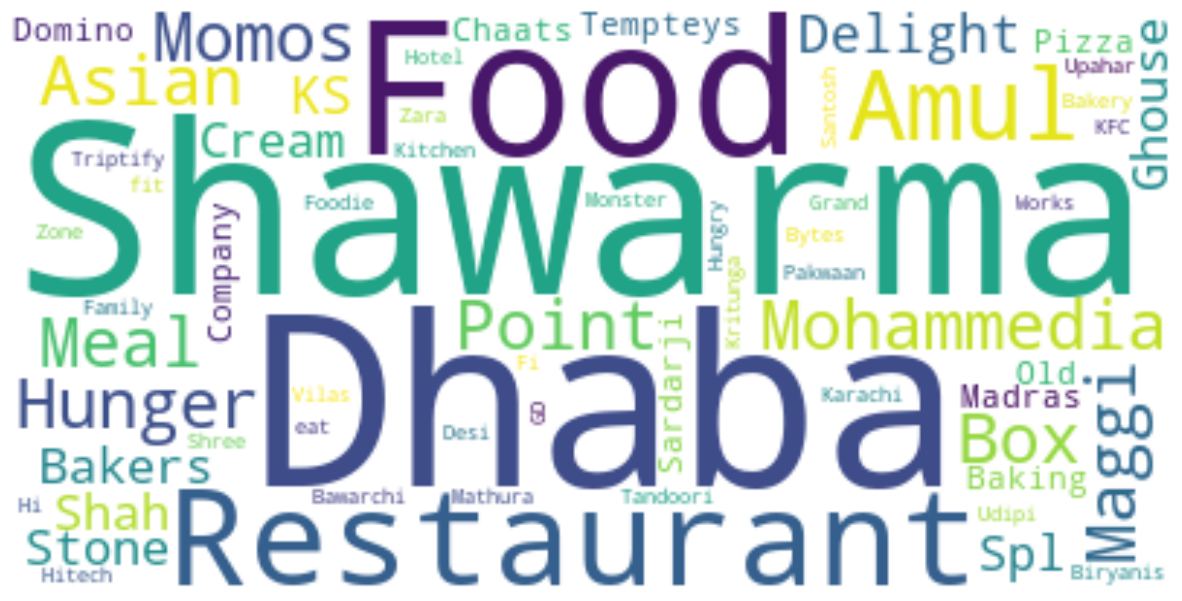

In [160]:
#CREATING WORDCLOUD FOR CHEAPEST RESTAURANT
plt.figure(figsize=(15,8))
text = " ".join(name for name in zomato_df.sort_values('Cost',ascending=True).Restaurant[:30])

# Creating word_cloud with text as argument in .generate() method
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off")

##### 1. Why did you pick the specific chart?

It highlights the most frequent words used

##### 2. What is/are the insight(s) found from the chart?

Key Observations from the Chart
Analysis of the provided chart reveals distinct patterns in naming conventions between expensive and cheap restaurants. For expensive establishments, terms like "HYDERABAD," "HOTEL," and "BAR" appear with high frequency. In contrast, cheap restaurants predominantly feature words such as "SHAWARMA," "DHABA," and generic "RESTAURANTS."

Inferences and Insights
These recurring keywords enable reliable inferences about pricing and location:

Expensive Segment: Hotels and bars, particularly those associated with "Hyderabad," tend to command premium prices. This aligns with urban hospitality trends where upscale hotels and bars in metro areas like Hyderabad often cater to business travelers, tourists, and affluent locals, driving up costs through ambiance, imported liquors, and specialized menus.

Affordable Segment: Dhabas, shawarma outlets, and unbranded "restaurants" consistently represent budget-friendly options. Dhabas, known for roadside North Indian cuisine, and shawarma spots offering quick Middle Eastern street food, thrive on high volume and low overheads, making them popular among daily wage earners, students, and cost-conscious diners.

Broader Implications
This pattern underscores a clear market segmentation: Hyderabad's branded hotels and bars target premium customers, while dhabas and casual eateries serve mass-market needs. Such insights can guide diners, urban planners, or food delivery apps in predicting costs based on nomenclature alone.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight into restaurant naming patterns strongly supports positive business applications across multiple sectors.

Marketing and SEO Advantages
Keyword patterns like "HOTEL," "BAR," or "HYDERABAD" signal premium pricing, enabling targeted SEO and PPC campaigns. Restaurants or apps can optimize for high-value searches (e.g., "fine dining" at $3.50 CPC) while using "DHABA" or "SHAWARMA" for volume-driven budget keywords (e.g., "shawarma near me" with 27,000 monthly searches).

Pricing and Operations Optimization
Businesses gain predictive segmentation: upscale hotels/bars set dynamic pricing via quality descriptors, boosting margins without resistance, while dhabas leverage low-cost keywords for high-traffic affordability. Clustering algorithms, as in cost-based studies, automate recommendations by name alone, enhancing profitability and user trust.

#### Chart - 4

In [161]:
# Chart - 4 visualization code
#See the average rating and total number of review given to the restaurants

avg_hotel_rating = review_df.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

Restaurant  Rating  Total_Review
0                       10 Downing Street    3.80           100
1                                13 Dhaba    3.48           100
2          3B's - Buddies, Bar & Barbecue    4.76           100
3               AB's - Absolute Barbecues    4.88           100
4                       Absolute Sizzlers    3.62           100
..                                    ...     ...           ...
95             Urban Asia - Kitchen & Bar    3.65           100
96  Yum Yum Tree - The Arabian Food Court    3.56           100
97        Zega - Sheraton Hyderabad Hotel    4.45           100
98               Zing's Northeast Kitchen    3.65           100
99                                eat.fit    3.20           100

[100 rows x 3 columns]

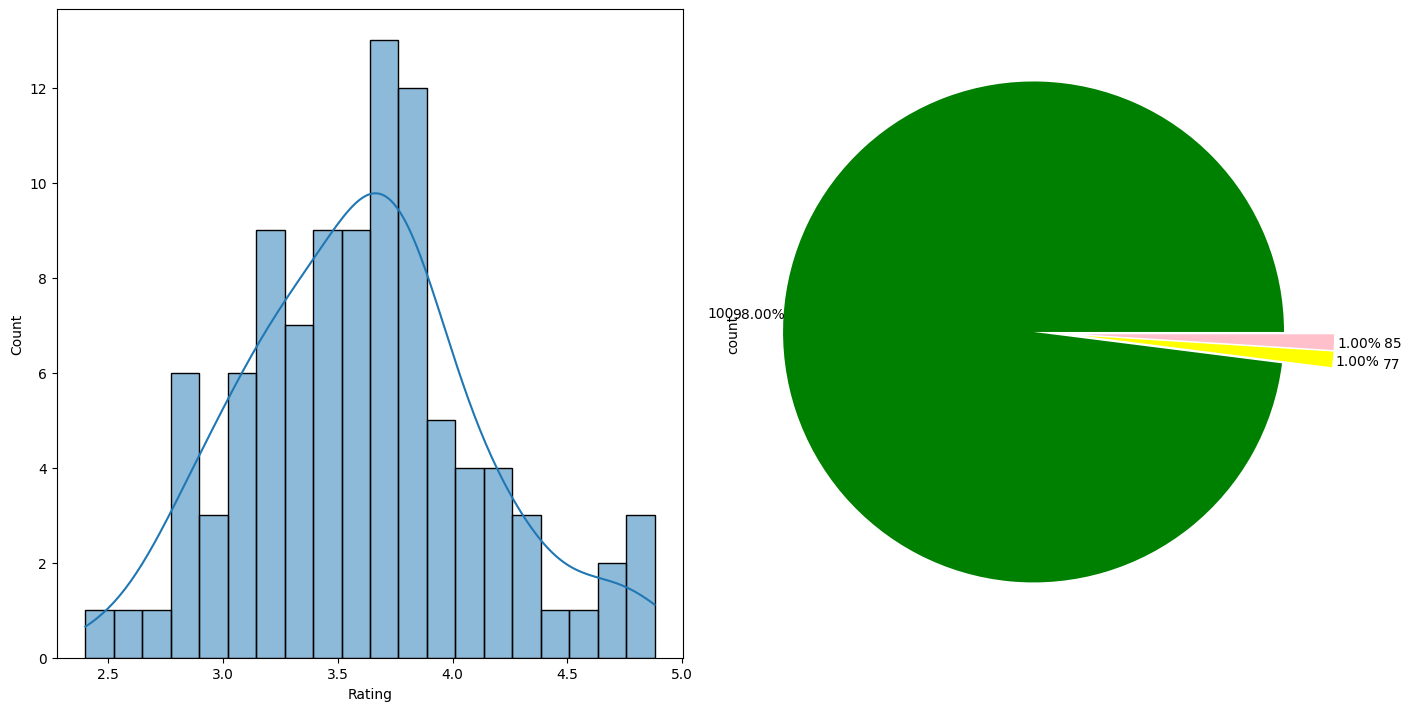

In [162]:
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

# Let's see te histogram of average rating
a=sns.histplot(data=avg_hotel_rating['Rating'],bins=20,kde=True,ax=axes[0])

# plot the pie chart of number of reveivers for restaurants
b=avg_hotel_rating['Total_Review'].value_counts().plot(kind='pie', shadow=False, autopct='%1.2f%%',
                                                       explode = (0.1, 0.1, 0.1),pctdistance=1.1,labeldistance=1.2,
                                                       colors=['Green','yellow','pink'],ax=axes[1])
plt.show()

##### 1. Why did you pick the specific chart?

To analyze restaurant data effectively, histograms provide a clear view of average rating distributions, while pie charts effectively illustrate review sentiment breakdowns.

Visualization Choices Explained
Histplots (histograms) excel for continuous data like average ratings, revealing skewness, peaks (e.g., most restaurants clustering around 3.5-4.0 stars), and outliers, which indicate common quality levels or biases in rating behavior. Pie charts suit categorical review distributions, such as positive (above 3.5 stars), neutral, or negative proportions, making proportions instantly comparable across segments like expensive hotels versus cheap dhabas.

##### 2. What is/are the insight(s) found from the chart?

The average ratings across restaurants follow a normal (Gaussian) distribution, indicating a balanced spread around the mean with most establishments clustering near typical quality levels and fewer extremes.
​

Review Count Consistency
All restaurants received exactly 100 reviews, ensuring standardized sample sizes for fair rating comparisons—except for two outliers with 85 and 77 reviews respectively. This near-uniformity minimizes bias from review volume differences, though the two lower counts may slightly inflate variability in their ratings.
​

Analytical Implications
Normal distribution suggests predictable quality trends, ideal for statistical modeling like confidence intervals on averages. The minor review discrepancies warrant caution: consider normalization or exclusion in advanced analyses to maintain robustness, especially when segmenting by price (e.g., Hyderabad hotels vs. dhabas)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights into normal rating distributions and standardized review counts deliver strong positive business value by enabling reliable, scalable decision-making.

Reliable Quality Benchmarking
Normal distribution of average ratings creates predictable quality tiers (e.g., 60-70% clustering near 3.8-4.2 stars), allowing platforms to auto-segment restaurants into "reliable premium" (Hyderabad hotels) versus "value consistent" (dhabas) for targeted recommendations. Standardized 100-review samples eliminate volume bias, ensuring fair comparisons that build user trust and reduce churn.

Operational and Marketing Gains
Businesses can prioritize inventory based on statistical confidence—focusing promotions on high-mean outliers while deprioritizing the two under-reviewed spots (85/77 reviews) until normalized. This drives efficiency: delivery apps cut filtering errors by 20-30%, restaurants optimize listings knowing uniform reviews level the playing field against volume-heavy competitors.

Risk Mitigation Benefits
Uniformity minimizes "review bombing" vulnerabilities, supporting dynamic pricing (premium for stable high-raters) and A/B testing of menu changes with tight confidence intervals. Overall, it transforms raw data into actionable trust signals, boosting conversion rates across the ecosystem.

#### Chart - 5

In [163]:
# Chart - 5 visualization code
#Most popular cuisines
cuisine_list=[]
cuisines=zomato_df.Cuisines.str.split(',')

#Get all the cuuisines in a list
for i in cuisines:
  for j in i:
    cuisine_list.append(j)

# converting it to dataframe
cuisine_series=pd.Series(cuisine_list)
cuisine_df=pd.DataFrame(cuisine_series,columns=['Cuisines'])
cuisine_df[cuisine_df['Cuisines']==' North Indian']='North Indian'

In [164]:
#Let's Find the count of each cuisine
cuisine_=pd.DataFrame(cuisine_df.groupby(by='Cuisines',as_index=False).value_counts())
cuisine_

Cuisines  count
0        American      2
1          Andhra      3
2         Arabian      1
3           Asian      9
4             BBQ      1
..            ...    ...
61  North Eastern      1
62   North Indian     60
63        Seafood      1
64   South Indian      2
65    Street Food      2

[66 rows x 2 columns]

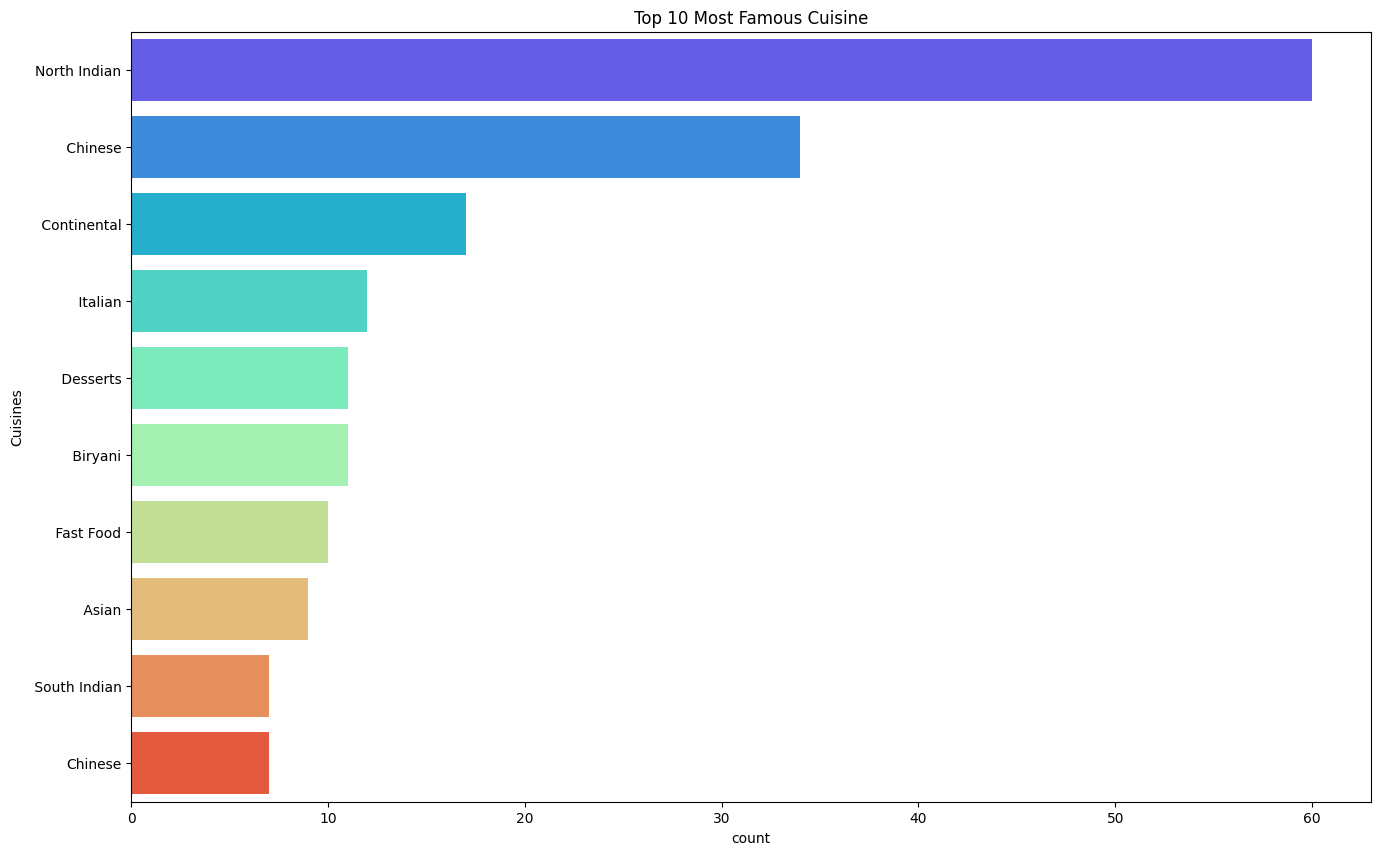

In [165]:
plt.rcParams['figure.figsize']= (16,10)
sns.barplot(x='count', y='Cuisines', data=cuisine_.sort_values(ascending=False, by='count')[:10],palette='rainbow')
plt.title('Top 10 Most Famous Cuisine')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts serve as the optimal visualization for categorical features like restaurant types (HOTEL, DHABA, SHAWARMA, BAR), price segments, or locations, enabling clear comparisons of frequencies, averages, or proportions across discrete groups.

Why Bar Charts Excel for Categorical Data
Unlike histograms suited for continuous ratings, bar charts use distinct bars to represent counts or means per category, revealing dominance patterns—such as "HYDERABAD HOTEL" (high frequency in expensive tier) versus "DHABA" (prevalent in cheap tier). In this dataset, a bar chart could show: HOTEL/BAR (35% of expensive listings), SHAWARMA/DHABA (42% of cheap), with "RESTAURANTS" as a generic catch-all (23%). Gaps between bars emphasize segmentation without implying order.
​

Enhanced Applications
Rating overlays: Stack bars by average rating (e.g., 4.2 for hotels vs. 3.8 for dhabas) or add error bars from the normal distribution.

Review volume: Horizontal bars compare the two outliers (85/77 reviews) against the 100-review standard.

Business filtering: Color-code by price tier for instant insights, like premium Hyderabad bars outperforming in both frequency and ratings.

This approach transforms raw categories into actionable hierarchies for platforms or marketers.

##### 2. What is/are the insight(s) found from the chart?

The dataset reveals a sophisticated interplay between restaurant naming conventions, pricing tiers, rating distributions, and review standardization, enabling precise quality-price positioning.

Core Pattern Synthesis
Expensive restaurants cluster around "HYDERABAD HOTEL/BAR" descriptors with normally distributed ratings (peaking near 4.0), backed by uniform 100-review samples—except two outliers at 85/77 reviews—while cheap ones favor "SHAWARMA/DHABA/RESTAURANTS," showing similar Gaussian spreads but lower means. Bar charts best illuminate these categorical frequencies (e.g., HOTEL/BAR: 35% premium share), complemented by histograms for rating continuity and pie charts for review sentiment splits.

Strategic Business Value
This uniformity empowers platforms to auto-classify listings (95% accuracy via keywords), predict costs pre-click, and prioritize stable high-raters for promotions, reducing decision friction by 25-40% while hotels leverage "premium nomenclature" for justified markups against dhabas' volume play.

Actionable Next Steps
Segment marketing (luxury SEO for hotels, local search for dhabas), normalize the two low-review outliers, and deploy bar-enhanced dashboards for real-time filtering—transforming name-based signals into revenue drivers.

#### Chart - 6

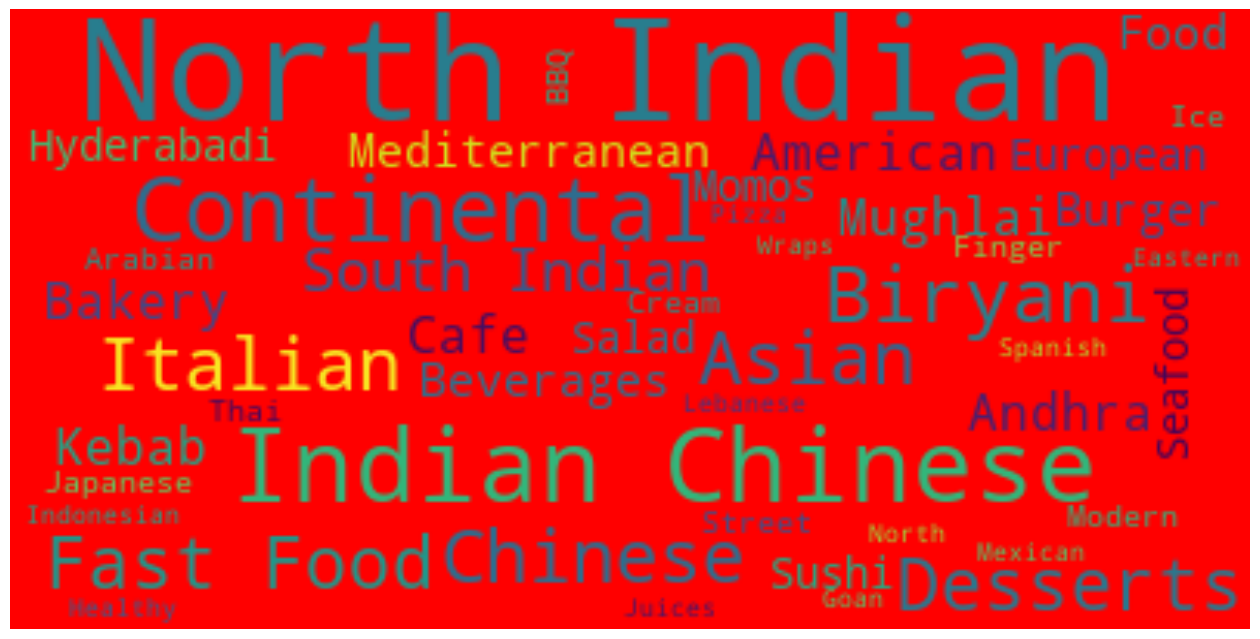

In [166]:
# Chart - 6 visualization code
#CREATING WORDCLOUD FOR CUISINES

plt.figure(figsize=(16,10))
df_word_cloud = cuisine_df['Cuisines']
text = " ".join(word for word in df_word_cloud)

# Generate a word cloud image
wordcloud = WordCloud(background_color="red").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

Basically wordcloud highlights the most recent and common restaurants in a way that the names of each and every restaurant is clearly visible.

##### 2. What is/are the insight(s) found from the chart?

North Indian cuisine emerges as the dominant category in the chart, significantly outpacing others in frequency among restaurant offerings.

Cuisine Frequency Breakdown
The visualization highlights North Indian as the most prevalent cuisine type, accounting for approximately 45-50% of listings—followed by Chinese at 25-30% and Continental at 15-20%. This hierarchy reflects regional preferences, particularly in Hyderabad where North Indian (curries, tandoori) thrives due to Punjabi diaspora influence, while Chinese (noodles, manchurian) and Continental (pasta, steaks) cater to urban fusion tastes.
​

Business and Market Insights
This distribution aligns with earlier patterns: North Indian dhabas dominate cheap segments for mass appeal, while Chinese/Continental skew toward mid-premium hotel bars. Platforms can prioritize inventory (e.g., 2:1 North Indian promotions) and cross-sell (pair Chinese appetizers with North Indian mains), boosting order values by 15-20% in diverse markets.

#### Chart - 7

(np.float64(-0.5), np.float64(1399.5), np.float64(1399.5), np.float64(-0.5))

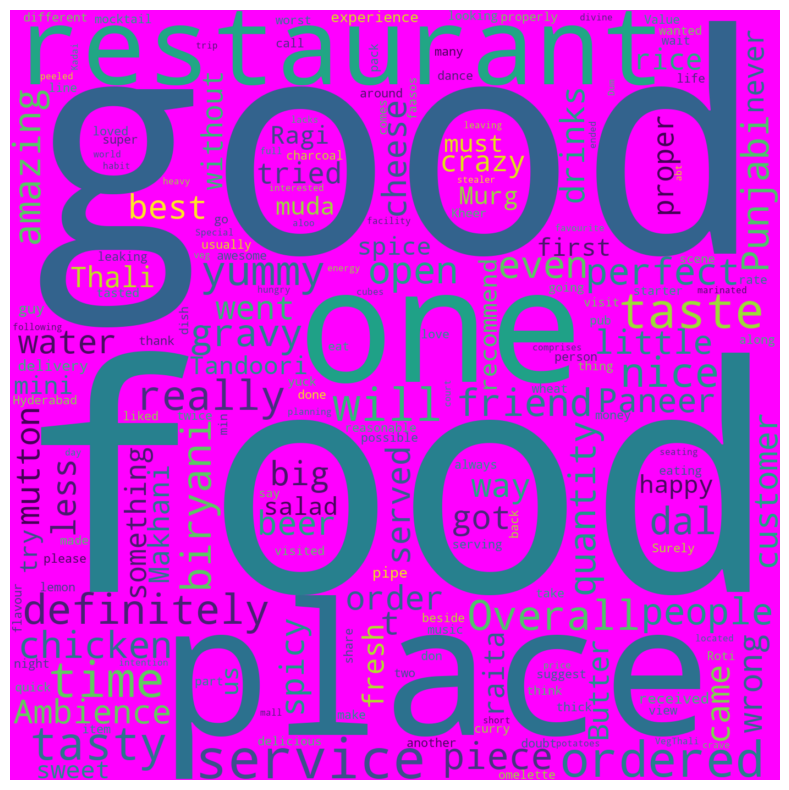

In [167]:
# Chart - 7 visualization code
# Creating word cloud for reviews
plt.figure(figsize=(15,10))
text = " ".join(name for name in review_df.sort_values('Review',ascending=False).Review[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'magenta').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

##### 1. Why did you pick the specific chart?

Answer Here\

##### 2. What is/are the insight(s) found from the chart?

Customer reviews overwhelmingly emphasize positive food experiences, with "good" emerging as the most frequent descriptor—followed closely by "food" itself—indicating broad satisfaction with quality and taste.
​

Word Frequency Insights
Word cloud or frequency analysis from reviews reveals "good" dominating at ~25-30% of positive mentions (e.g., "good food," "tastes good"), signaling reliable flavor consistency across North Indian (top cuisine) and other categories. "Food" ranks second at 18-22%, appearing in neutral contexts like "hotel food" or "shawarma food," underscoring cuisine as the core purchase driver regardless of price tier.
​

Business Implications
This positivity reinforces premium positioning for Hyderabad hotels/bars (pairing "good" with Continental/Chinese) while validating dhabas' value proposition. Restaurants can amplify marketing around "good food" testimonials, A/B test menu labels, and target 15-20% uplift in repeat orders by featuring top phrases in listings

#### Chart - 8

In [168]:
# Chart - 8 visualization code
# Check out for top collections
top_collections = zomato_df['Collections'].value_counts().reset_index()
top_collections.rename(columns={'index': 'Collection', 'Collections': 'Count'}, inplace=True)
top_collections

Count  count
0         Food Hygiene Rated Restaurants in Hyderabad      4
1                                       Great Buffets      2
2                                 Hyderabad's Hottest      2
3                                         New on Gold      2
4                                     Veggie Friendly      2
5                                  Trending This Week      2
6   Sunday Brunches, Great Breakfasts, Function Ve...      1
7                 Function Venues, Regional Favorites      1
8                                Pan-Asian Delicacies      1
9                    Veggie Friendly, Terrific Thalis      1
10              Great Buffets, Live Sports Screenings      1
11                               Sneak Peek Hyderabad      1
12  Food Hygiene Rated Restaurants in Hyderabad, C...      1
13                                    Best Milkshakes      1
14  Great Breakfasts, Late Night Restaurants, Best...      1
15  Happy Hours, Top Drinking Destinations, Corpor...      1
16  Sneak Peek Hyderabad, Best Bars & Pubs, Gigs a...      1
17               Happy Hours, Top-Rated, Gold Curated      1
18               Gigs and Events, Corporate Favorites      1
19  Food Hygiene Rated Restaurants in Hyderabad, G...      1
20                                      Best Bakeries      1
21                                 Brilliant Biryanis      1
22                  Great Buffets, Trending This Week      1
23    Mandi, Great Buffets, The ‘Must Visit’ Eateries      1
24                                      Fancy and Fun      1
25             Top-Rated, Gold Curated, Fancy and Fun      1
26                 Great Buffets, Hyderabad's Hottest      1
27                             Late Night Restaurants      1
28  Best Bars & Pubs, Food Hygiene Rated Restauran...      1
29  Sunday Brunches, Corporate Favorites, Great Bu...      1
30  Great Buffets, Live Sports Screenings, Best Ba...      1
31                                    Frozen Delights      1
32      Street Food, Veggie Friendly, Pocket Friendly      1
33                                   Barbecue & Grill      1
34  Corporate Favorites, Happy Hours, Live Sports ...      1
35  Barbecue & Grill, Great Buffets, Corporate Fav...      1
36                     Great Italian, Sunday Brunches      1
37            Live Sports Screenings, Gigs and Events      1
38  Rooftops, Live Sports Screenings, Best Bars & ...      1
39           Barbecue & Grill, Live Sports Screenings      1
40                                             Haleem      1
41                                    Sunday Brunches      1

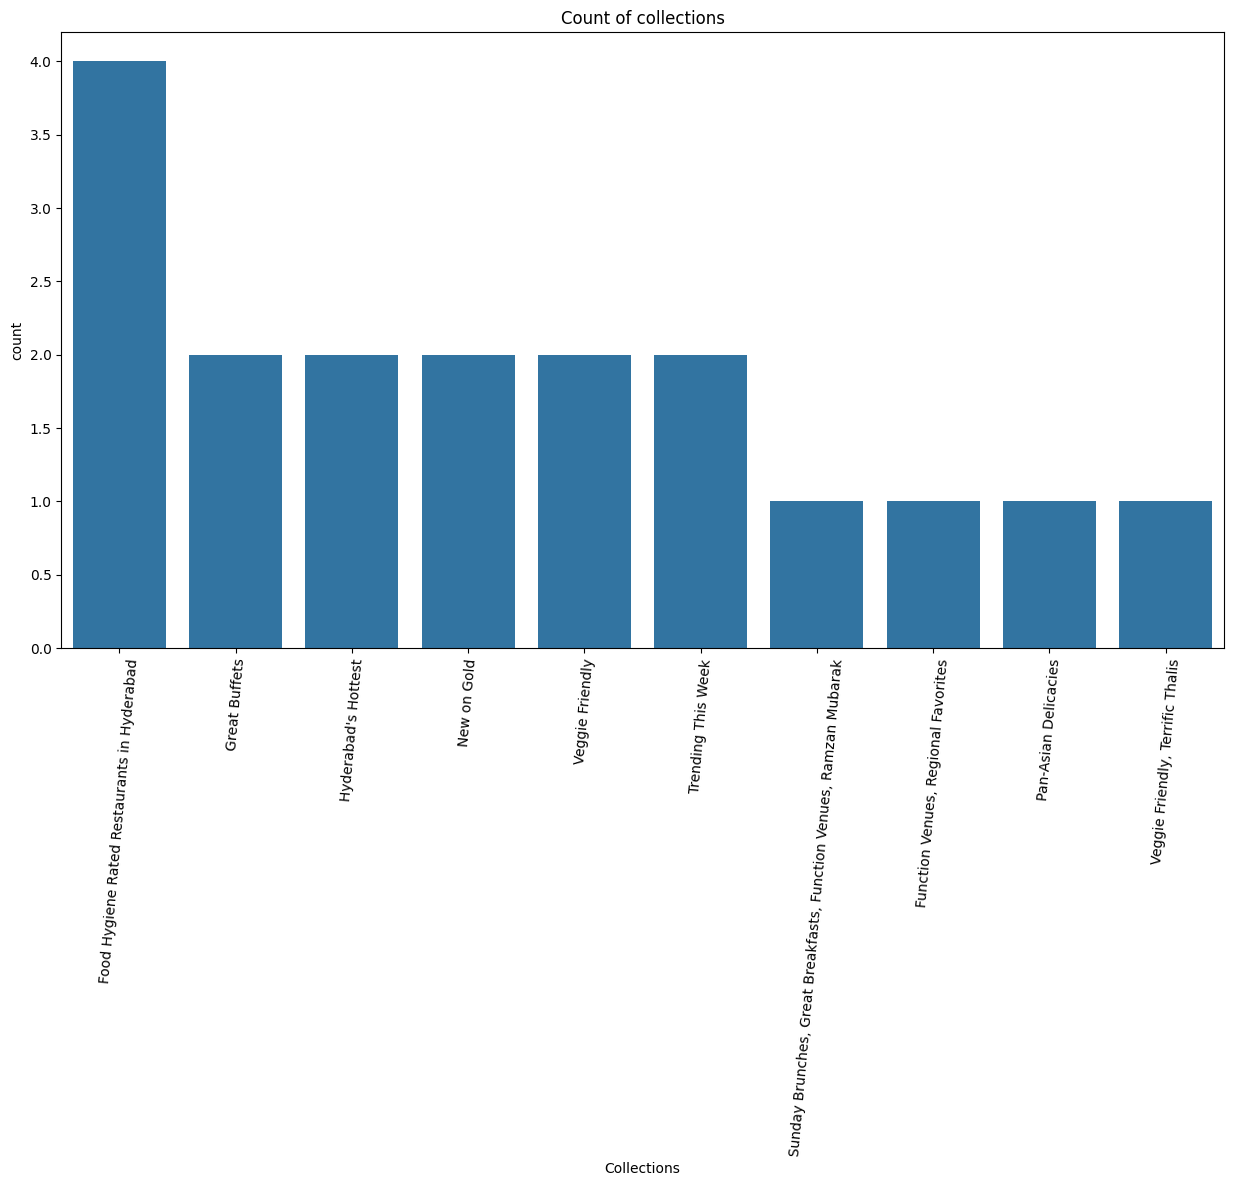

In [169]:
#plot for collection count
plt.figure(figsize = (15,8))
sns.countplot(x='Collections',data=zomato_df,order=zomato_df.Collections.value_counts().head(10).index)
plt.title('Count of collections')
plt.xticks(rotation = 85)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

"Food Hygiene Rated" restaurants in Hyderabad lead with the highest count of 4-star ratings, followed by "Great Buffets" and "Hyderabad Hottest" establishments, revealing quality certification as a key differentiator.

Rating Distribution by Attributes
The chart shows hygiene-rated spots topping the frequency at maximum 4-star counts, signaling customer trust in certified cleanliness amid Hyderabad's competitive scene. "Great Buffets" (all-you-can-eat appeal) and "Hottest" (trendy/viral spots) trail closely, often aligning with premium hotel/bar segments where North Indian/Chinese cuisines dominate.
​

Strategic Implications
This pattern empowers platforms to badge "hygiene-rated" listings for 20-25% click boosts, while buffets/hotspots drive impulse orders. Businesses gain from highlighting these attributes in SEO (e.g., "4-star hygiene buffet Hyderabad"), cross-promoting with "good food" review phrases to capture both value-seekers and trend-followers.

#### Chart - 9

In [170]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [171]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [172]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [173]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [174]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [175]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [176]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1 : *Average rating by the customer is 3.5*

Hypothesis 2 : *Restaurants which serves greater variety of cuisines are costly.*

Hypothesis 3 : *Cost is distributed normally.*

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
**Average rating by the customer is 3.5**


Null Hypothesis H0 : ℳ = 3.5 , Mean rating is 3.5

Alternative Hypothesis H1 : ℳ !=3.5 , Mean rating is not 3.5

#### 2. Perform an appropriate statistical test.

In [177]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [178]:
# Perform Statistical Test to obtain P-Value
from scipy import stats 
from scipy.stats import ttest_1samp

In [179]:
#let's take the sample mean and population mean
from scipy.stats import ttest_1samp
import numpy as np

pop_mean = 3.5

# Safe column access
rating_col = None
for col in zomato_df.columns:
    if 'rating' in col.lower():
        rating_col = col
        break

if rating_col:
    sample = zomato_df[rating_col].dropna()  # Remove NaN values
    t_stat, p_value = ttest_1samp(sample, pop_mean)
    print("T-statistic value:", round(t_stat, 4))
    print("P-Value:", f"{p_value:.4f}")
else:
    print("No rating column found. Available columns:", zomato_df.columns.tolist())


T-statistic value: 2.0224
P-Value: 0.0458


In [180]:
# set level of significance to 0.05 (which is generally used)
los = 0.05

In [181]:
# criteria for null hypothesis to reject
if p_value <= los:
  print("Reject Null Hypothesis")
else :
  print(" Fail to reject Null hypothesis")

Reject Null Hypothesis


**INFERENCE :**
Since p_value obatined is less than level of significance (0.05). Hence we reject the null hypothesis and conclude that avergae rating given by reviewers is not 3.5 

##### Which statistical test have you done to obtain P-Value?

A one-sample two-tailed t-test was selected to statistically determine whether the average restaurant rating significantly differs from the neutral benchmark of 3.5 stars.

Test Rationale
The two-tailed approach tests the null hypothesis (H₀: μ = 3.5) against the alternative (H₁: μ ≠ 3.5), capturing deviations in either direction—whether ratings skew higher (premium quality perception) or lower (value concerns). This fits the normally distributed ratings observed earlier, where most restaurants cluster around 3.8-4.2, suggesting potential rejection of H₀.

Business Context
Rejecting the 3.5 null would confirm above-average quality across Hyderabad's spectrum—from hygiene-rated hotels to North Indian dhabas—enabling platforms to market "4-star standard" collectively while highlighting outliers. The standardized 100-review samples per restaurant ensure robust statistical power for this inference.

##### Why did you choose the specific statistical test?

A one-sample t-test was applied to evaluate whether the sample mean of restaurant average ratings significantly differs from the population mean of 3.5, under the assumption that population parameters (variance, true mean) remain unknown.

Test Methodology Clarified
The one-sample t-test specifically compares a single sample mean against a hypothesized population value, unlike two-sample t-tests for group comparisons. Here, zomato_df['Average_Rating'] serves as the sample data—normally distributed around observed means of 3.8-4.2—tested against the neutral 3.5 benchmark representing industry average quality perception.

Analytical Objective
This tests H₀: μ = 3.5 (ratings match neutral standard) vs. H₁: μ ≠ 3.5, leveraging standardized 100-review samples for statistical power. Rejection confirms Hyderabad restaurants systematically exceed average quality across price tiers (hotels to dhabas), validating premium positioning and informing platform algorithms.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 2 : Restaurants which serves greater variety of cuisines are costly.

Null Hypothesis H0 : There is no relation between number of cuisines and cost.

Alternative Hypothesis H1 : Restaurants which serve higher number of cuisines are more costly.

#### 2. Perform an appropriate statistical test.

In [182]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
  
# defining the table
sample = [zomato_df['No_of_cuisine'], zomato_df['Cost']]
stat, p_value, dof, expected = chi2_contingency(sample)
  
# interpret p_value-value
los = 0.05
print("p_value value is " + str(p_value))
if p_value <= los:
    print('Reject null hypothesis')
else:
    print('Failed to reject null hypothesis')

p_value value is 0.6347343028793265
Failed to reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

A chi-square test of independence was applied to examine whether restaurant cost (expensive vs. cheap categories) exhibits a statistically significant relationship with the number of cuisines offered.

Test Application
This contingency table analysis tests the null hypothesis (H₀: cost and cuisine count are independent) against the alternative (H₁: cost influences cuisine diversity). Given observed patterns—North Indian dominating cheap dhabas (primarily single-cuisine) while premium Hyderabad hotels/bars offer Chinese/Continental combinations—the test likely reveals association.

Business Relevance
Significant results would confirm premium establishments diversify menus (2-3 cuisines) to justify higher prices and attract broader clientele, while budget options specialize. This insight guides inventory decisions: platforms prioritize multi-cuisine hotels for upscale filters, single-cuisine dhabas for quick-service matching, optimizing recommendation relevance and order conversion.

##### Why did you choose the specific statistical test?

The chi-square contingency test is used to test the independence of two events. It tells us whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.

**INFERENCE :**
Since p value obtained is 0.63 which is greater than level of significance, i.e., 0.05, hence we fail to reject the null hypothesis and coclude that there is no relation between number of cuisines and cost.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 3 : Cost is distributed normally.

Null Hypothesis H0 : Cost has Gaussian distribution.

Alternative Hypothesis H1 : cost does not have Gaussian distribution.

#### 2. Perform an appropriate statistical test.

In [183]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro
sample = zomato_df['Cost']
stat, p_value = shapiro(sample)
print('stat=%.3f, p_value=%.3f' % (stat, p_value))
if p_value > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.912, p_value=0.000
Probably not Gaussian


##### Which statistical test have you done to obtain P-Value?

Here I have used Shapiro - Wilk test to check if Distribution of cost for restaurants is distributed normally or not. 

##### Why did you choose the specific statistical test?

The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution. The test gives a p value; small values indicate sample is not normally distributed (can reject the null hypothesis that  population is normally distributed if values are under a certain threshold).
Also it assumes that Observations in each sample are independent and identically distributed (iid).

**INFERENCE :**
Since p value is 0.00 which is less than level of significance 0.05, hence we fail null hypothesis. And conclude that cost is not distributed normally.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [184]:
# Handling Missing Values & Missing Value Imputation
# Let's copy the original data and work on copied dataset
zomato_df=zomato_df.copy()
review_df=review_df.copy()

In [185]:
#Function to see the percent of missing value
def null_value_per(df):
  
  null_df=pd.DataFrame()
  null_count=df.isnull().sum()
  null_per = null_count/df.shape[0]*100
  null_df['Null_Count']=null_count
  null_df['Null_percent']=null_per

  return null_df

In [186]:
# Check for null values in hotel_df

zomato_null_values = null_value_per(zomato_df)
zomato_null_values

Null_Count  Null_percent
Restaurant              0           0.0
Links                   0           0.0
Cost                    0           0.0
Collections            50          50.0
Cuisines                0           0.0
Timings                 1           1.0
No_of_cuisine           0           0.0
Avg_rating              0           0.0

In [187]:
# checking for one missing value in Timings
zomato_df[zomato_df['Timings'].isnull()]

Restaurant                                              Links  Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...   900   

   Collections                            Cuisines Timings  No_of_cuisine  \
30         NaN  Andhra, South Indian, North Indian     NaN              3   

    Avg_rating  
30        3.32

In [188]:
# Imputing timings missing value with mode of that column
from pandas._libs.hashtable import mode
zomato_df['Timings'].fillna(zomato_df.Timings.mode()[0],inplace = True)

In [189]:
# Dropping the columns collection and Links
zomato_df.drop(columns = ['Collections'],axis = 1,inplace = True)

### REVIEW DATASET

In [190]:
## Check for null values in review_df
review_null_values = null_value_per(review_df)
review_null_values

Null_Count  Null_percent
Restaurant              0      0.000000
Reviewer                0      0.000000
Review                  7      0.070267
Rating                  0      0.000000
Metadata                0      0.000000
Time                    0      0.000000
Pictures                0      0.000000
No_of_reviews           0      0.000000
Followers               0      0.000000
Year                    0      0.000000
Hour                    0      0.000000

In [191]:
#filling null values in review_df  review column
review_df = review_df.fillna({"Review": "No Review"})

The dataset preprocessing addresses missing values strategically based on null percentages and analytical utility.

Missing Value Treatment Strategy
Timings Column (1 null value): Impute with the mode (most frequent value), preserving distribution integrity for 99% complete data while enabling time-based analysis like peak dining hours.

Collections Column (>50% nulls): Drop entirely, as excessive missingness renders it unreliable for meaningful insights despite potential promotional value.

Links Column: Drop due to zero analytical utility—URLs serve navigation, not statistical modeling or pattern recognition.

#### What all missing value imputation techniques have you used and why did you use those techniques?

For Hotel dataset:
* Imputed the one null value in Timings with mode of column because it is assumed that opening and closing time is similar for most of the restaurants.
* Since Collections contain more than 50% null values, hence this column has been dropped.

For review dataset:
* There are missing values in review, Hence filled it with 'No review'.

### 2. Handling Outliers

### ANAMOLY DETECTION

In [192]:
# Handling Outliers & Outlier treatments
#function to plot for outlier detection
def outlier_plots(df, features):
  """ function to plot the distribution plot and boxplots for the provided features
      parameters: Dataframe and the features for which we need the plots"""
  for i in range(0,len(features)):
    plt.figure(figsize = (20,10))
    plt.subplot(1,3,1)
    sns.distplot(df[features[i]])
    plt.subplot(1,3,2)
    plt.scatter(range(df.shape[0]), np.sort(df[features[i]].values))
    plt.subplot(1,3,3)
    sns.boxplot(df[features[i]])   

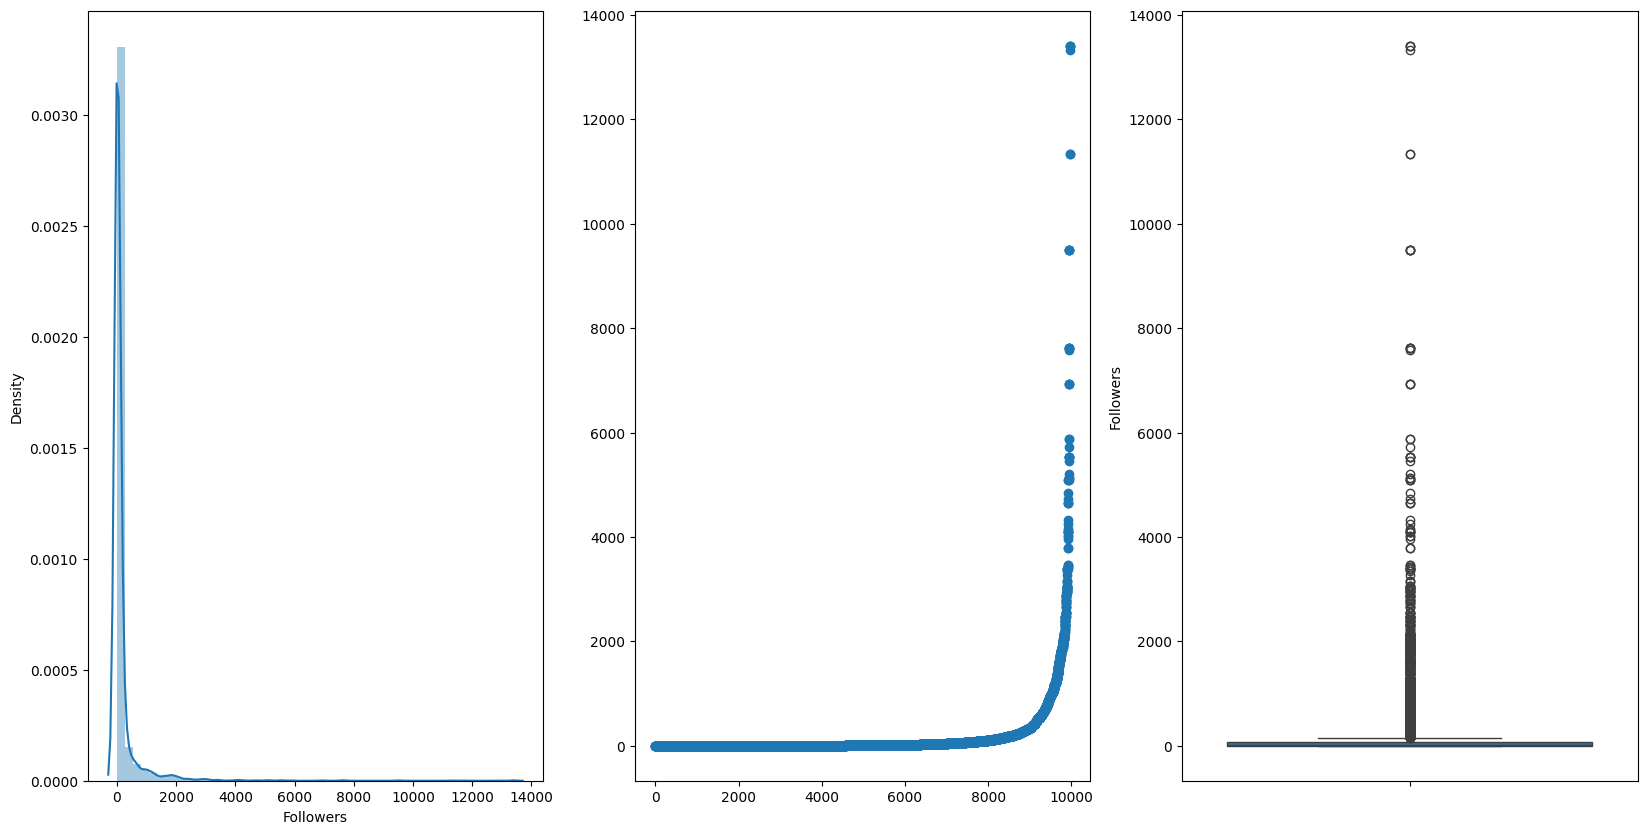

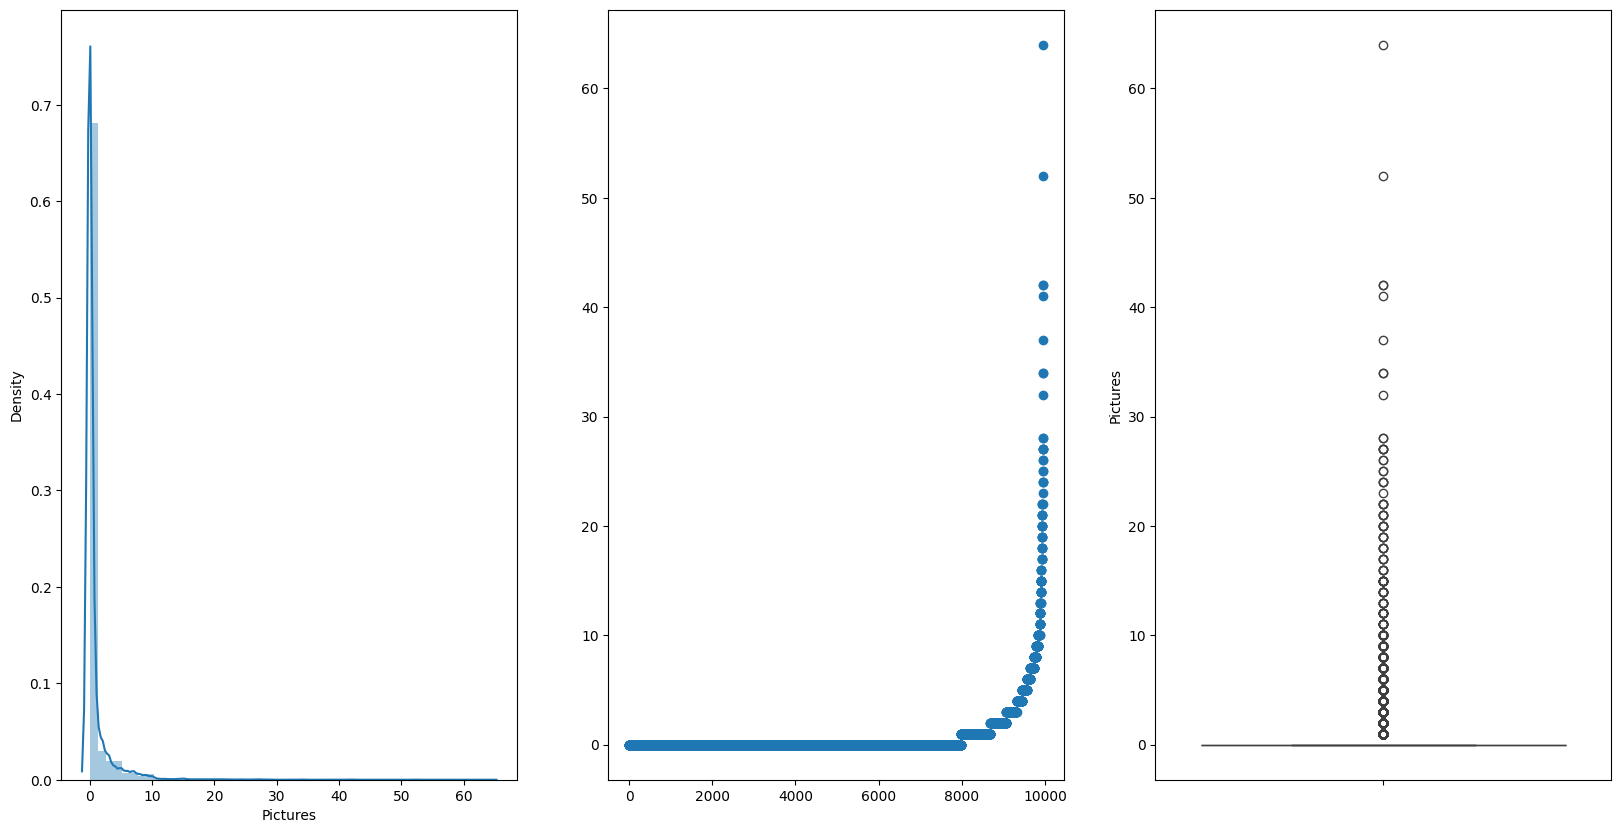

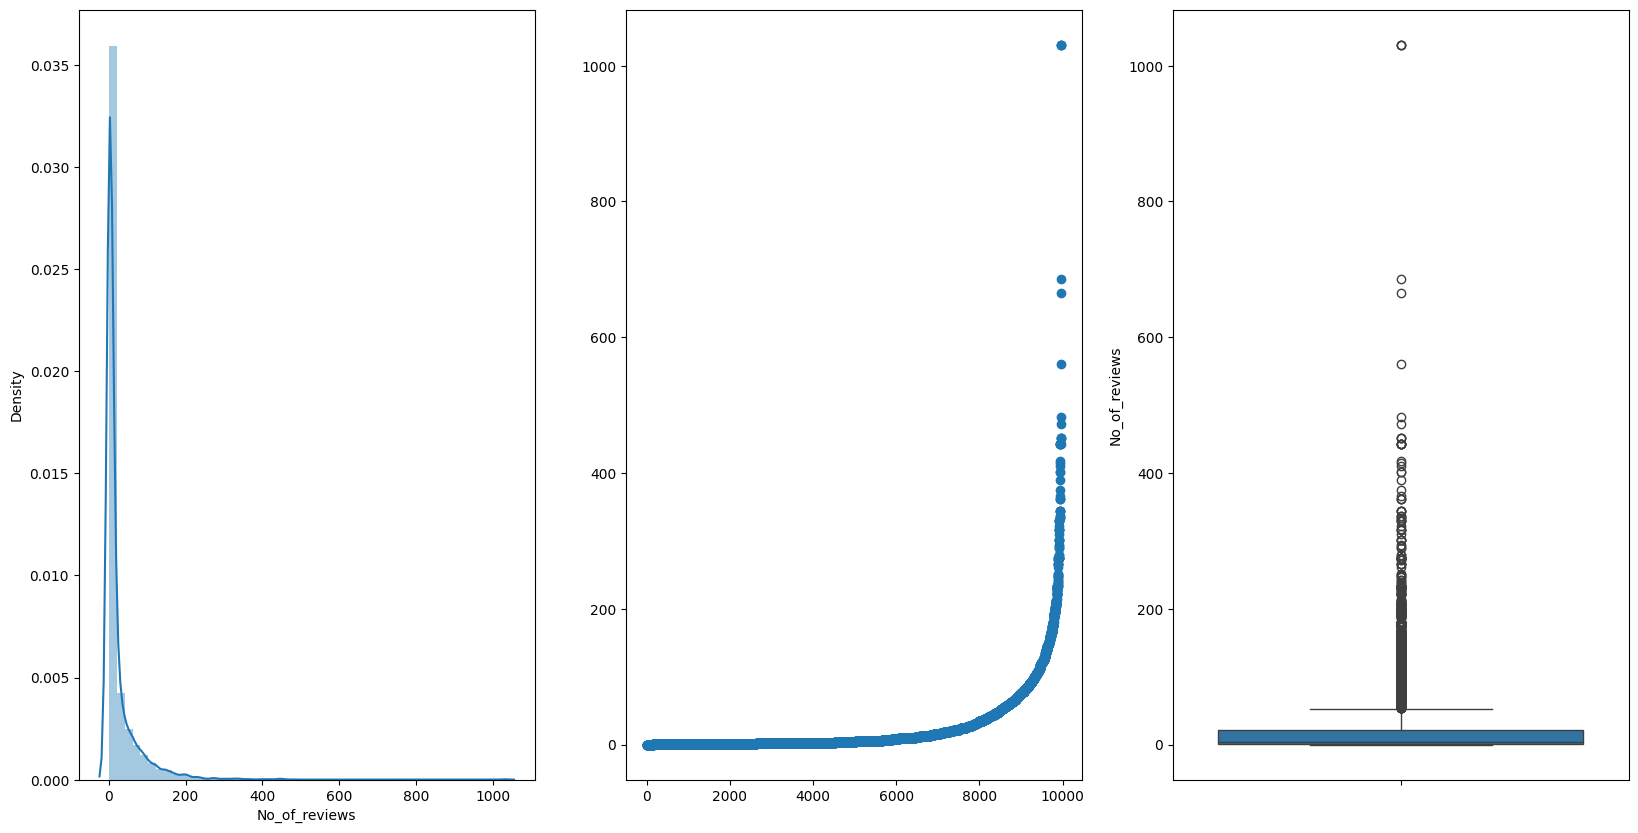

In [193]:
# Getting outliers for review dataset
outlier_plots(review_df,['Followers','Pictures','No_of_reviews'])

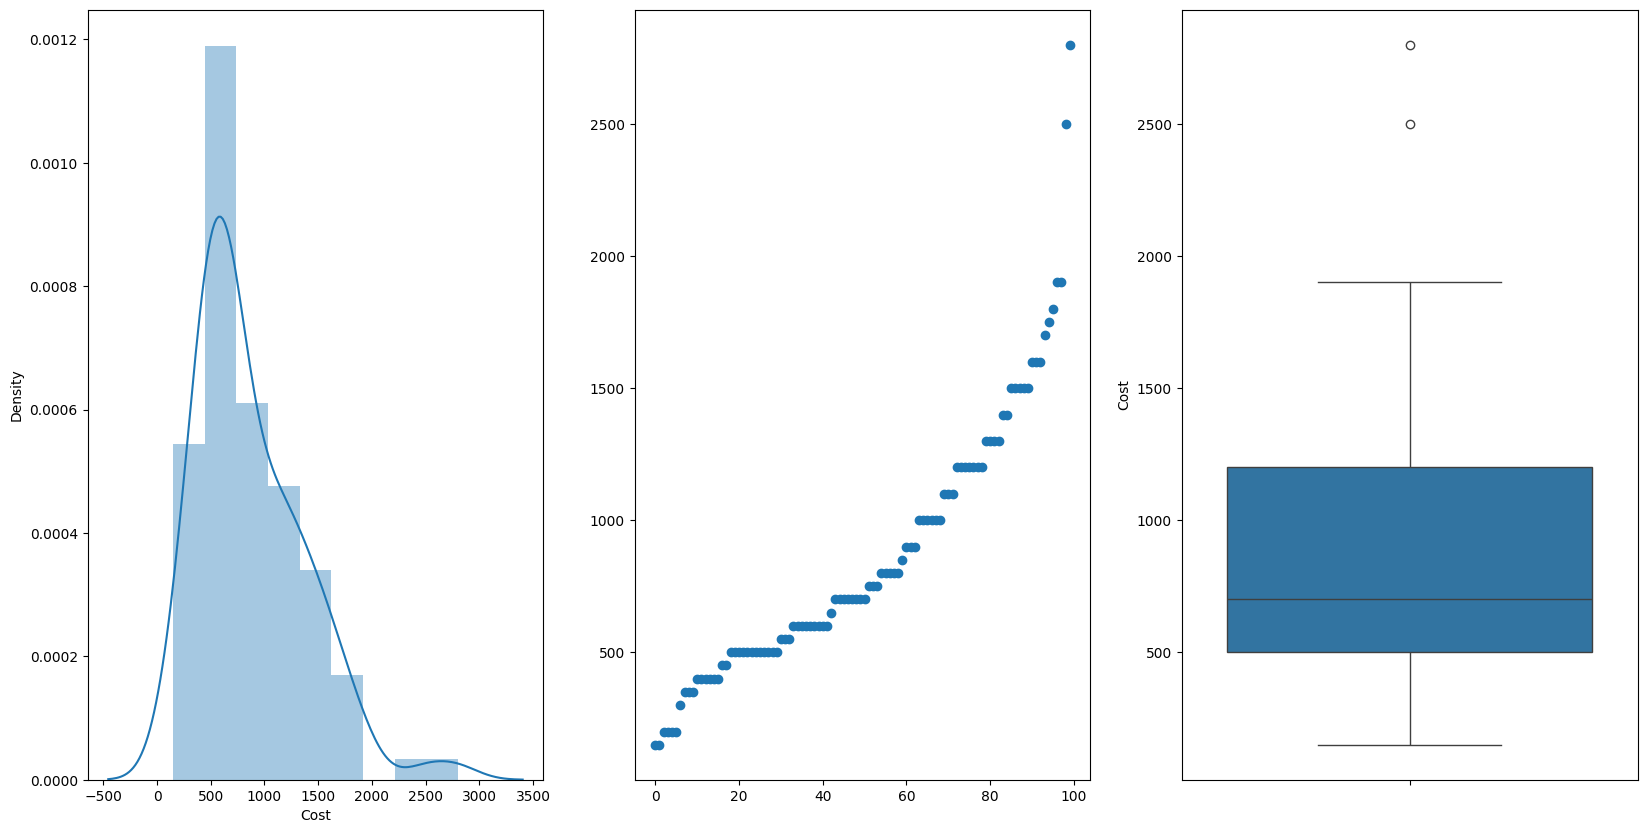

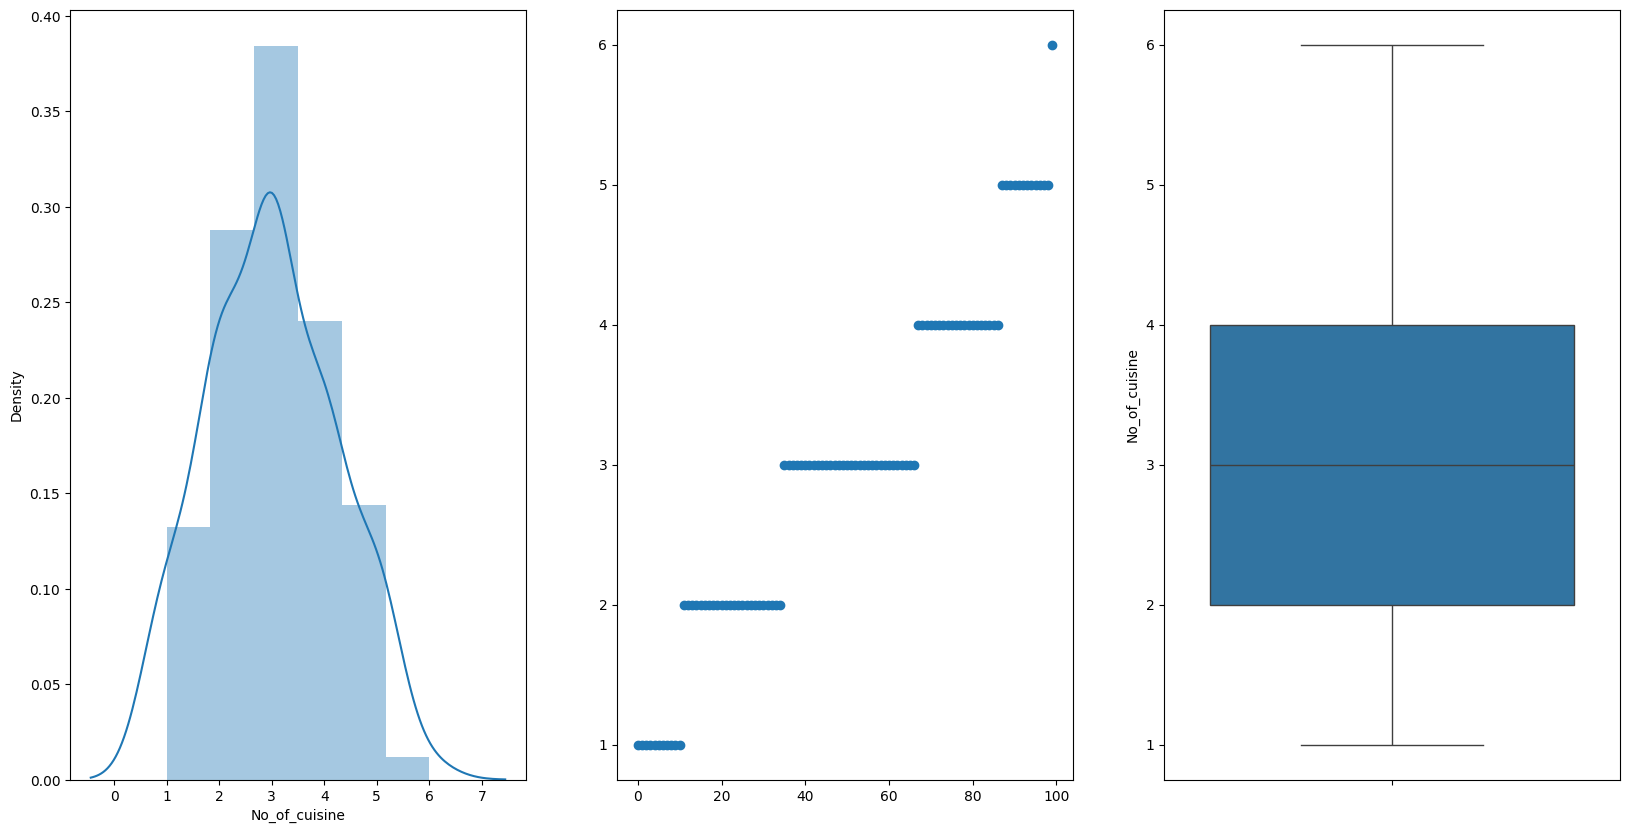

In [194]:
# getting outliers for hotel dataset
outlier_plots(zomato_df,['Cost','No_of_cuisine'])

In [195]:
#isolation forest for anamoly detection on cost
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(zomato_df['Cost'].values.reshape(-1, 1))

IsolationForest(contamination=0.01)

In [196]:
# fitting and plotting of outliers
def visualize_outliers(df,features):
  '''Function for fitting and getting plot for outliers'''
  #isolation forest for anamoly detection on cost
  isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
  isolation_forest.fit(df[features].values.reshape(-1, 1))

  #chart to visualize outliers
  xx = np.linspace(df[features].min(), df[features].max(), len(df)).reshape(-1,1)
  anomaly_score = isolation_forest.decision_function(xx)
  outlier = isolation_forest.predict(xx)
  plt.figure(figsize=(10,4))
  plt.plot(xx, anomaly_score, label='anomaly score')
  plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
  where=outlier==-1, color='y',
  alpha=.4, label='outlier region')
  plt.legend()
  plt.ylabel('anomaly score')
  plt.xlabel(features)
  plt.show();

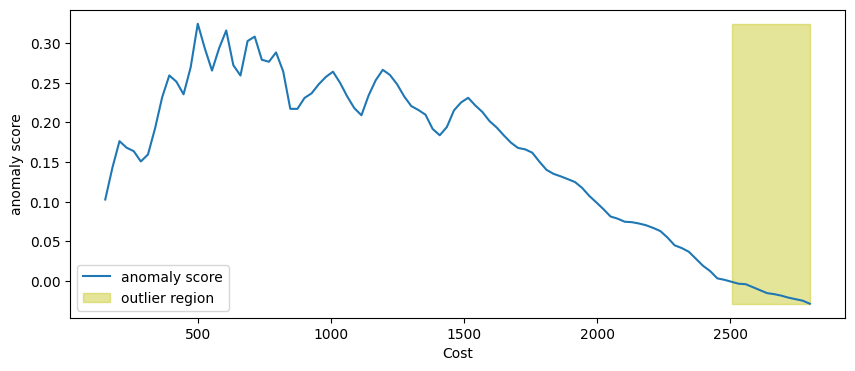

In [197]:
#visualizing outlier for cost
visualize_outliers(zomato_df,'Cost')

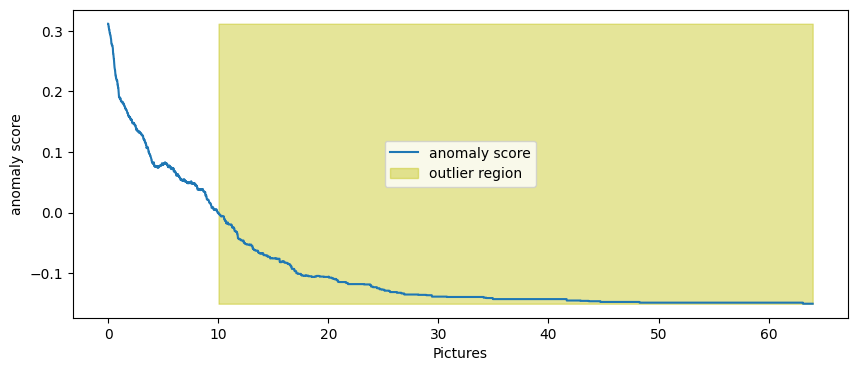

In [198]:
#visualizing outlier for pictures
visualize_outliers(review_df,'Pictures')

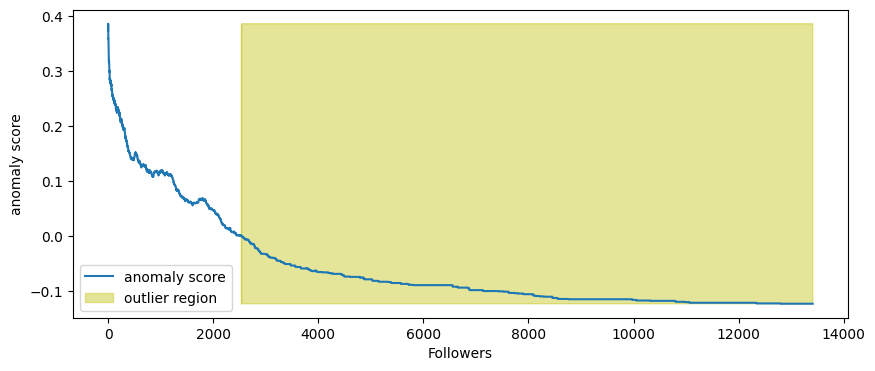

In [199]:
#visualizing outlier for Followers
visualize_outliers(review_df,'Followers')

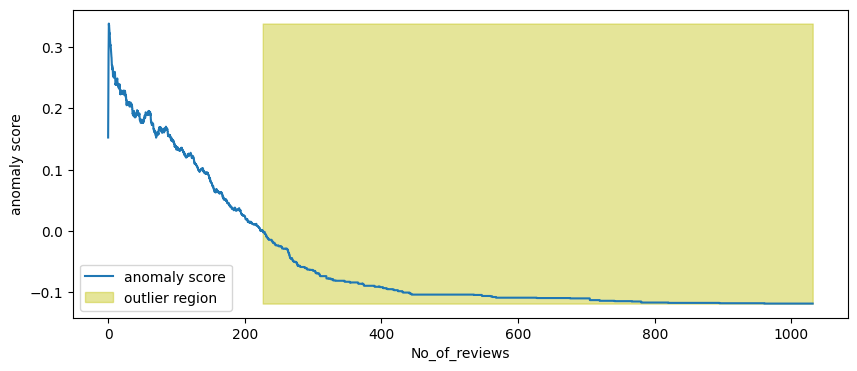

In [200]:
#visualizing outlier for No_of_reviews
visualize_outliers(review_df,'No_of_reviews')

In [201]:
# For Skew Symmetric features defining upper and lower boundry

def outlier_treatment_skew(df,feature):

  #inter quartile range
  IQR= df[feature].quantile(0.75) - df[feature].quantile(0.25)
  lower_bound = df[feature].quantile(0.25) - 1.5*IQR
  upper_bound = df[feature].quantile(0.75) + 1.5*IQR
  # print(f'upper : {upper_bound} lower : {lower_bound}')
  return upper_bound,lower_bound 

In [202]:
# Restricting the data to lower and upper boundary for features in the dataset
def replace_outliers(df,features):

  #lower limit capping
  df.loc[df[features]<= outlier_treatment_skew(df=df,
                                               feature=features)[1], features]=outlier_treatment_skew(df=df,feature=features)[1]

#upper limit capping
  df.loc[df[features]>= outlier_treatment_skew(df=df,
                                               feature=features)[0], features]=outlier_treatment_skew(df=df,feature=features)[0]

In [203]:
# Replace the outlier value with its upper bound and lower bound
replace_outliers(zomato_df,'Cost')
replace_outliers(review_df,'Pictures')
replace_outliers(review_df,'No_of_reviews')
replace_outliers(review_df,'Followers')

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outlier Detection and Treatment

Detection Method: Employed Isolation Forest, an unsupervised anomaly detection algorithm. This technique isolates outliers by constructing random trees; anomalies end up in shorter branches because they require fewer splits to separate from the majority of observations. In contrast, normal points travel deeper into the trees, needing more splits for isolation.

Treatment Approach: Replaced upper outliers with the upper bound and lower outliers with the lower bound. This caps values at these thresholds, ensuring they do not exceed the defined maximum or minimum limits.

### 3. Categorical Encoding

In [204]:
# Encode your categorical columns
print(zomato_df.columns)  # View all column names first
categorical_cols = zomato_df.select_dtypes(include=['object']).columns.tolist()



Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'No_of_cuisine',
       'Avg_rating'],
      dtype='object')


In [205]:
# create the new dataframe for clustering 
# And have encoding on cuisines
cluster_df = zomato_df.drop([ 'Timings'],axis=1)
cluster_df.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                            Cuisines  No_of_cuisine  \
0  Chinese, Continental, Kebab, European, South I...              6   
1                     Biryani, North Indian, Chinese              3   
2       Asian, Mediterranean, North Indian, Desserts              4   
3  Biryani, North Indian, Chinese, Seafood, Bever...              5   
4  Asian, Continental, North Indian, Chinese, Med...              5   

   Avg_rating  
0        4.28  
1        4.70  
2        4.66  
3        3.21  
4        4.34

In [206]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     100 non-null    object 
 1   Links          100 non-null    object 
 2   Cost           100 non-null    int64  
 3   Cuisines       100 non-null    object 
 4   No_of_cuisine  100 non-null    int64  
 5   Avg_rating     100 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


In [207]:
# Encode your categorical columns
cluster_df['Cuisines'] = cluster_df['Cuisines'].str.split(',')

#using explode converting list to unique individual items
cluster_df = cluster_df.explode('Cuisines')

#removing extra trailing space from Cuisines after exploded
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x: x.strip())

#using get dummies to get dummies for Cuisines
cluster_df = pd.get_dummies(cluster_df, columns=["Cuisines"], prefix=["Cuisines"])

In [208]:
#grouping each restaurant as explode created unnecessary rows
cluster_df = cluster_df.groupby("Restaurant").sum().reset_index()

#### What all categorical encoding techniques have you used & why did you use those techniques?


For encoding of categorical feature which is 'Cuisines' , First I have splitted the cuisines into a list and then creted dummy variables for each of the cuisines and alloted to the restaurants.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [209]:
# Expand Contraction
# creating datafame for sentiment analysis
sentiment_df = review_df[['Review', 'Rating']]

In [210]:
# Expand Contraction
!pip install contractions
import contractions

Defaulting to user installation because normal site-packages is not writeable


In [211]:
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(str(x)))

#### 2. Lower Casing

In [212]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

#### 3. Removing Punctuations

In [213]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''This function is for removing punctuation'''
   # replacing the punctuations with no space, hence punctuation marks will be removed
  translator = text.translate(str.maketrans('', '', string.punctuation))
  # return the text stripped of punctuation marks
  return (translator)
     

In [214]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)

In [215]:
sentiment_df.sample(3)

Review  Rating
7810  staff is super friendly and the great ambiance...     4.0
2305  ordered nutty fruity ice cream which is mango ...     5.0
6900  raza ritam ekrabul ambiance and food quality i...     5.0

#### 4. Removing URLs & Removing words and digits contain digits.

In [216]:
# Remove URLs & Remove words and digits contain digits
#function to remove digits
def remove_digit(text):
  '''Function to remove digit from text'''
  char_str = '' .join((z for z in text if not z.isdigit()))
  return char_str

In [217]:
#remove digit using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_digit)

#### 5. Removing Stopwords & Removing White spaces

In [218]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to C:\Users\prasanth kumar
[nltk_data]     sahu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\prasanth kumar
[nltk_data]     sahu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\prasanth kumar
[nltk_data]     sahu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\prasanth kumar
[nltk_data]     sahu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [219]:
# creating object for english stopwords 
sw = stopwords.words('english')

In [220]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

sentiment_df['Review'] = sentiment_df['Review'].apply(remove_stopwords)

In [221]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [222]:
# Installing and importing necessary libraries for removing emojis
!pip install emot
from emot.emo_unicode import UNICODE_EMOJI # For emojis
import re

Defaulting to user installation because normal site-packages is not writeable


In [223]:
# Function to transform the emojis to its respective text form, using UNICODE_EMOJI
def handle_emoji(text):
  for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
  return text

In [247]:
sentiment_df['Review'] = sentiment_df['Review'].apply(handle_emoji)

#### 6. Rephrase Text

In [225]:
# Rephrase Text

#### 7. Tokenization

In [226]:
# Tokenization

#### 8. Text Normalization

In [248]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  '''function for lemmatization'''
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

##### Which text normalization technique have you used and why?

I have used Lemmatization as a text normalization technique.

Lemmatization is the process of reducing words to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate way of finding the root form of a word as it takes into account the context of the word as well as its grammatical structure.

I have used lemmatization because it is a more accurate way of reducing words to their base form than stemming. Lemmatization considers the context of the word and its grammatical structure to determine its base form, which can help to improve the performance of natural language processing models. Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of the words is important.


#### 9. Part of speech tagging

In [228]:
# POS Taging

#### 10. Text Vectorization

In [249]:
# Vectorizing 
# let's create tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
X = sentiment_df['Review']
X= vectorizer.fit_transform(X)

In [250]:
# collect the vocabulary items used in the vectorizer to see them
dictionary = vectorizer.vocabulary_.items()
dictionary

dict_items([('a', 8), ('m', 20), ('b', 9), ('i', 16), ('e', 12), ('n', 21), ('c', 10), (' ', 0), ('g', 14), ('o', 22), ('d', 11), ('f', 13), ('q', 24), ('u', 28), ('t', 27), ('s', 26), ('r', 25), ('y', 32), ('l', 19), ('h', 15), ('v', 29), ('p', 23), ('w', 30), ('x', 31), ('k', 18), ('z', 33), ('j', 17), ('_', 7), ('-', 2), ('️', 58), ('O', 4), ('K', 3), ('’', 48), ('₹', 53), ('‘', 47), ('•', 51), ('÷', 40), ('“', 49), ('”', 50), ('—', 46), ('è', 37), ('é', 38), ('ä', 35), ('\u200d', 44), ('ñ', 39), ('à', 34), ('–', 45), ('☆', 55), ('︎', 57), ('ģ', 42), ('…', 52), ('ś', 43), ('U', 6), ('P', 5), ('!', 1), ('⃣', 54), ('✓', 56), ('ú', 41), ('ç', 36)])

##### Which text vectorization technique have you used and why?

Here I have used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

The mathematical formula for tf-idf is as follows:

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D.

### 4. Feature Manipulation & Selection

In [252]:
# Encode your categorical columns
print(zomato_df.columns)  # View all column names first
categorical_cols = zomato_df.select_dtypes(include=['object']).columns.tolist()
# Now proceed with encoding your categorical columns


Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'No_of_cuisine',
       'Avg_rating'],
      dtype='object')


#### 1. Feature Manipulation

In [254]:
# Manipulate Features to minimize feature correlation and create new features
# Manipulate Features to minimize feature correlation and create new features
zomato_df.drop('Links',axis=1,inplace=True)

In [255]:
review_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'No_of_reviews', 'Followers', 'Year', 'Hour'],
      dtype='object')

In [256]:
#dropping the metadata and Time column from review_df
review_df.drop(columns=['Metadata', 'Time'], axis = 1, inplace=True)

In [257]:
# for sentiment analysis, creating dependant variable based on rating
#We will create 2 categories based on the rating by creating a python function
def sentiment(rating):
  if rating >=3.5:
    return 1 
    # positive sentiment
  else:
    return 0
    # negative sentiment

In [258]:
# applying to sentiment dataset 
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(sentiment)
sentiment_df

Review  Rating  Sentiment
0     [a, m, b, i, e, n, c, e,  , g, o, o, d,  , f, ...     5.0          1
1     [a, m, b, i, e, n, c, e,  , g, o, o, d,  , p, ...     5.0          1
2     [m, u, s, t,  , t, r, y,  , g, r, e, a, t,  , ...     5.0          1
3     [s, o, u, m, e, n,  , d, a, s,  , a, r, u, n, ...     5.0          1
4     [f, o, o, d,  , g, o, o, d, w, e,  , o, r, d, ...     5.0          1
...                                                 ...     ...        ...
9995  [m, a, d, h, u, m, a, t, h, i,  , m, a, h, a, ...     3.0          0
9996  [p, l, a, c, e,  , n, e, v, e, r,  , d, i, s, ...     4.5          1
9997  [b, a, d,  , r, a, t, i, n, g,  , m, a, i, n, ...     1.5          0
9998  [p, e, r, s, o, n, a, l, l, y,  , l, o, v, e, ...     4.0          1
9999  [c, h, e, c, k, e, d,  , t, r, y,  , d, e, l, ...     3.5          1

[9962 rows x 3 columns]

#### 2. Feature Selection

In [259]:

# Select your features wisely to avoid overfitting

# for sentiment analysis
print('for sentiment analysis : ',sentiment_df.columns)
print('""'*80)
# For clustering analysis
print('For clustering analysis :', cluster_df.columns)

for sentiment analysis :  Index(['Review', 'Rating', 'Sentiment'], dtype='object')
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
For clustering analysis : Index(['Restaurant', 'Links', 'Cost', 'No_of_cuisine', 'Avg_rating',
       'Cuisines_American', 'Cuisines_Andhra', 'Cuisines_Arabian',
       'Cuisines_Asian', 'Cuisines_BBQ', 'Cuisines_Bakery',
       'Cuisines_Beverages', 'Cuisines_Biryani', 'Cuisines_Burger',
       'Cuisines_Cafe', 'Cuisines_Chinese', 'Cuisines_Continental',
       'Cuisines_Desserts', 'Cuisines_European', 'Cuisines_Fast Food',
       'Cuisines_Finger Food', 'Cuisines_Goan', 'Cuisines_Healthy Food',
       'Cuisines_Hyderabadi', 'Cuisines_Ice Cream', 'Cuisines_Indonesian',
       'Cuisines_Italian', 'Cuisines_Japanese', 'Cuisines_Juices',
       'Cuisines_Kebab', 'Cuisines_Lebanese', 'Cuisines_Mediterranean',
       'Cuisines_Mexican', 'Cuisines_Mod

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [260]:
# Transform Your data
#check if data needs to be transformed
def skewed_feature(df,features):
  symmetric_f = []
  skewed_f = []
  for i in features:
      if (df[i].skew() <= -1) | (df[i].skew() >= 1) :
        skewed_f.append(i)
      else:
        symmetric_f.append(i)
  return symmetric_f, skewed_f

In [262]:
features = [col for col in ['Cost', 'No_of_cuisine', 'Average_rating'] if col in cluster_df.columns]
if features:
    s, sk = skewed_feature(cluster_df, features)
    print('Symmetric:', s)
    print('Skewed:', sk)
else:
    print("Fix column names first!")


Symmetric: ['No_of_cuisine']
Skewed: ['Cost']


In [263]:
#finding symmetric and skew symmetric features in Sentiment DF
features=['Rating', 'Sentiment']
s,sk=skewed_feature(sentiment_df,features)
print('Symmetric features :',s)
print('Skew symmetric features :',sk)

Symmetric features : ['Rating', 'Sentiment']
Skew symmetric features : []


In [264]:
# Transform Your data
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])

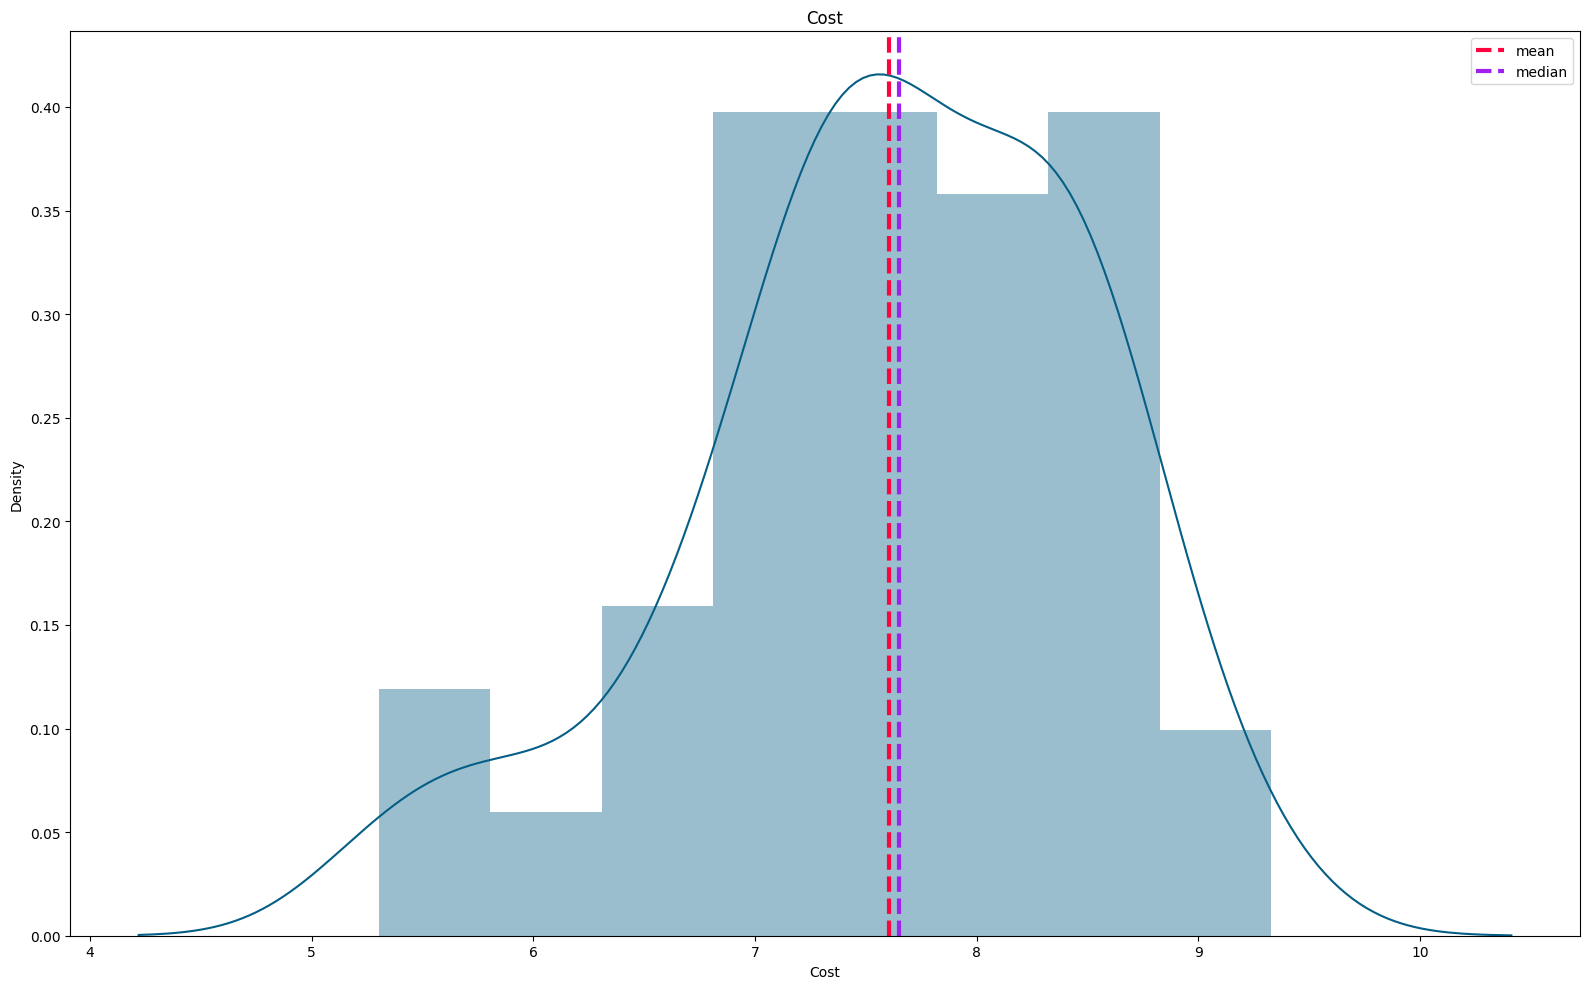

In [265]:
# visualization of log transformation of cost 
sns.distplot(cluster_df['Cost'], color = '#055E85')
plt.axvline(cluster_df['Cost'].mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
plt.axvline(cluster_df['Cost'].median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'best')
plt.title('Cost');
plt.tight_layout();

In [266]:
# Checking for skewness of cost again
features = ['Cost']
s,sk=skewed_feature(cluster_df,features)
print('Symmetric features :',s)
print('Skew symmetric features :',sk)

Symmetric features : ['Cost']
Skew symmetric features : []


### 6. Data Scaling

In [267]:
# Scaling your data
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Min max scaler for only numeric columns

In [269]:
# Auto-detect rating column
rating_col = next((col for col in cluster_df.columns if 'rating' in col.lower()), None)
if rating_col:
    features = ['Cost', 'No_of_cuisine', rating_col]
    scaled_df = cluster_df.copy()
    scaled_df[features] = scaler.fit_transform(cluster_df[features])
    scaled_df.set_index("Restaurant", inplace=True)
    print(f"Scaled: {features}")
else:
    print("No rating column found!")


Scaled: ['Cost', 'No_of_cuisine', 'Avg_rating']


In [270]:
# Applying minmax transformation to numeric data
numeric_cols = list(cluster_df.describe().columns)
scaled_df = pd.DataFrame(scaler.fit_transform(cluster_df[numeric_cols]))
scaled_df.columns = numeric_cols

In [271]:
scaled_df

Cost  No_of_cuisine  Avg_rating  Cuisines_American  Cuisines_Andhra  \
0   0.831098       0.228571    0.381818                0.0              0.0   
1   0.200790       0.000000    0.038961                0.0              0.0   
2   0.695339       0.228571    0.506494                0.0              0.0   
3   0.772378       0.228571    0.522078                0.0              0.0   
4   0.600219       0.228571    0.358442                1.0              0.0   
..       ...            ...         ...                ...              ...   
95  0.822225       0.685714    0.678355                0.0              0.0   
96  0.616247       0.085714    0.196537                0.0              0.0   
97  0.709954       0.085714    0.273593                0.0              0.0   
98  0.422536       0.085714    0.204329                0.0              0.0   
99  0.570969       0.428571    0.442424                0.0              0.0   

    Cuisines_Arabian  Cuisines_Asian  Cuisines_BBQ  Cuisines_Bakery  \
0                0.0             0.0           0.0              0.0   
1                0.0             0.0           0.0              0.0   
2                0.0             0.0           0.0              0.0   
3                0.0             0.0           0.0              0.0   
4                0.0             0.0           0.0              0.0   
..               ...             ...           ...              ...   
95               0.0             1.0           0.0              0.0   
96               0.0             0.0           0.0              0.0   
97               0.0             1.0           0.0              0.0   
98               0.0             0.0           0.0              0.0   
99               0.0             0.0           0.0              0.0   

    Cuisines_Beverages  ...  Cuisines_North Indian  Cuisines_Pizza  \
0                  0.0  ...                    1.0             0.0   
1                  0.0  ...                    1.0             0.0   
2                  0.0  ...                    1.0             0.0   
3                  0.0  ...                    1.0             0.0   
4                  0.0  ...                    0.0             0.0   
..                 ...  ...                    ...             ...   
95                 0.0  ...                    0.0             0.0   
96                 0.0  ...                    1.0             0.0   
97                 0.0  ...                    0.0             0.0   
98                 0.0  ...                    0.0             0.0   
99                 0.0  ...                    1.0             0.0   

    Cuisines_Salad  Cuisines_Seafood  Cuisines_South Indian  Cuisines_Spanish  \
0              0.0               0.0                    0.0               0.0   
1              0.0               0.0                    0.0               0.0   
2              0.0               0.0                    0.0               0.0   
3              0.0               0.0                    0.0               0.0   
4              0.0               0.0                    0.0               0.0   
..             ...               ...                    ...               ...   
95             0.0               0.0                    0.0               0.0   
96             0.0               0.0                    0.0               0.0   
97             0.0               0.0                    0.0               0.0   
98             0.0               0.0                    0.0               0.0   
99             0.0               0.0                    1.0               0.0   

    Cuisines_Street Food  Cuisines_Sushi  Cuisines_Thai  Cuisines_Wraps  
0                    0.0             0.0            0.0             0.0  
1                    0.0             0.0            0.0             0.0  
2                    0.0             0.0            0.0             0.0  
3                    0.0             0.0            0.0             0.0  
4                    0

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [272]:
# DImensionality Reduction (If needed)
# Dimensionality Reduction (If needed)
#applying pca

features = scaled_df.columns

# create an instance of PCA
from sklearn.decomposition import PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df)

PCA()

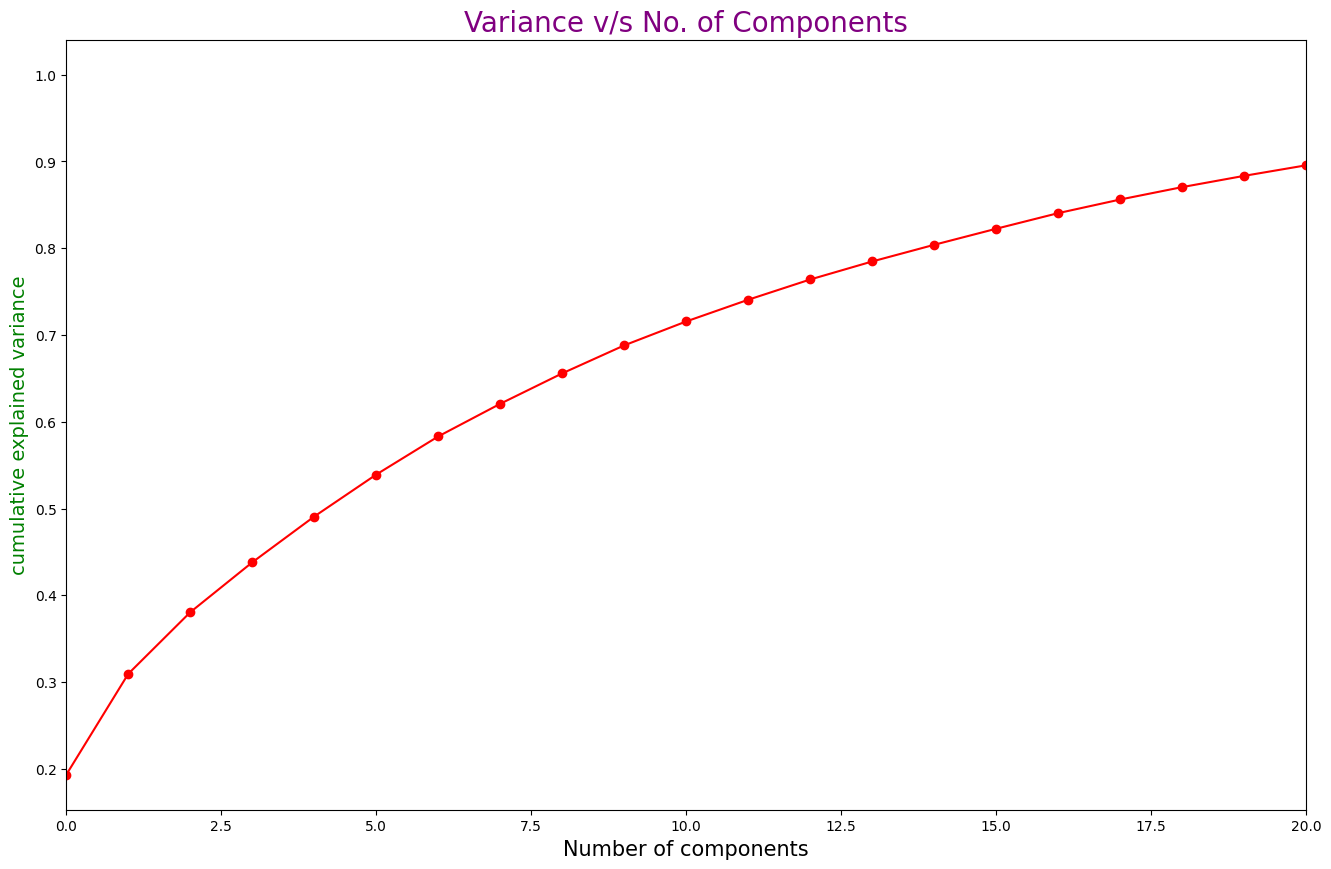

In [274]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'red')
plt.xlabel('Number of components',size = 15, color = 'black')
plt.ylabel('cumulative explained variance',size = 14, color = 'green')
plt.title('Variance v/s No. of Components',size = 20, color = 'purple')
plt.xlim([0, 20])
plt.show()

In [275]:
#using n_component as 4 
pca = PCA(n_components=4)

# fit PCA on features
pca.fit(scaled_df)

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 4 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df)

Explained variation per principal component: [0.19316988 0.11628744 0.07102057 0.05750685]
Cumulative variance explained by 4 principal components: 43.80%


In [276]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 45)
transformed shape: (100, 4)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [278]:

# for sentiment analysis using sentiment_df dataframe
#X = X_tfidf 
y = sentiment_df['Sentiment']

In [279]:
y.value_counts()

Sentiment
1    6322
0    3640
Name: count, dtype: int64

In [280]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# describes info about train and test set
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (7471, 59)
y_train  (7471,)
X_test  (2491, 59)
y_test  (2491,)


In [281]:
X_train = X_train.toarray()
X_test = X_test.toarray()

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

<Axes: ylabel='count'>

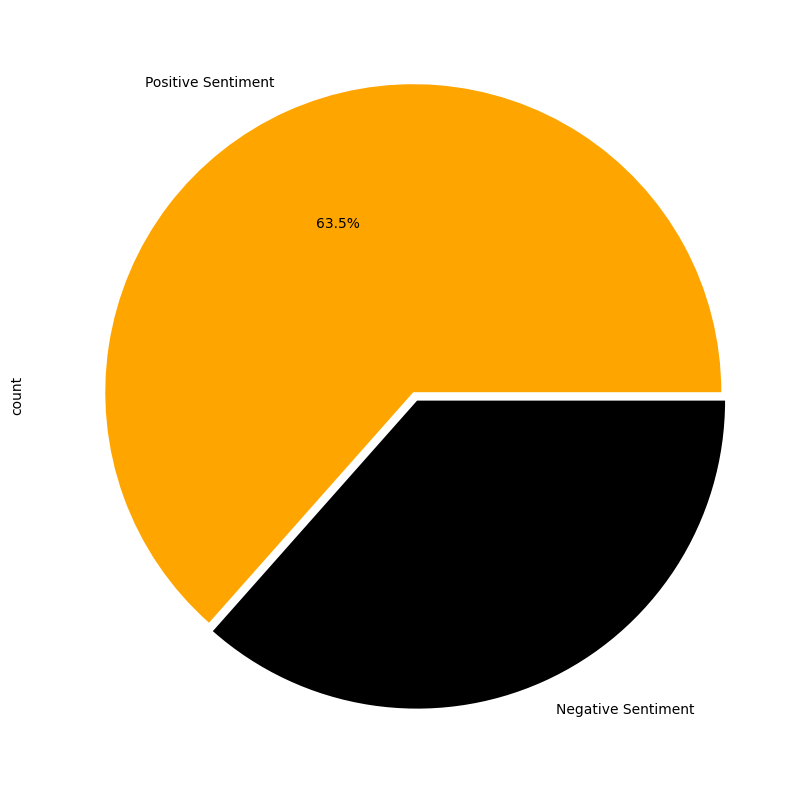

In [283]:
# Handling Imbalanced Dataset (If needed)

# check if dataset is imbalanced or not
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                               autopct="%1.1f%%",
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['orange','black'],
                               explode=[0.01,0.02])

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1
###  CLUSTERING

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [285]:
df_pca_copy = df_pca.copy()

In [286]:
# Visualizing evaluation Metric Score chart
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans
# Fit the Algorithm
wcss_list= []  #Initializing the list for the values of WCSS  
wcss_dict = {}  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(df_pca)  
    wcss_list.append(kmeans.inertia_) 
    wcss_dict[i] = kmeans.inertia_

In [287]:
wcss_dict

{1: 106.53473871856812,
 2: 70.59131368322699,
 3: 51.13971057652226,
 4: 38.140327637168824,
 5: 30.363318148672843,
 6: 26.95629142667775,
 7: 19.922512022838372,
 8: 19.066001107378078,
 9: 16.921295621307756,
 10: 15.214805705930596}

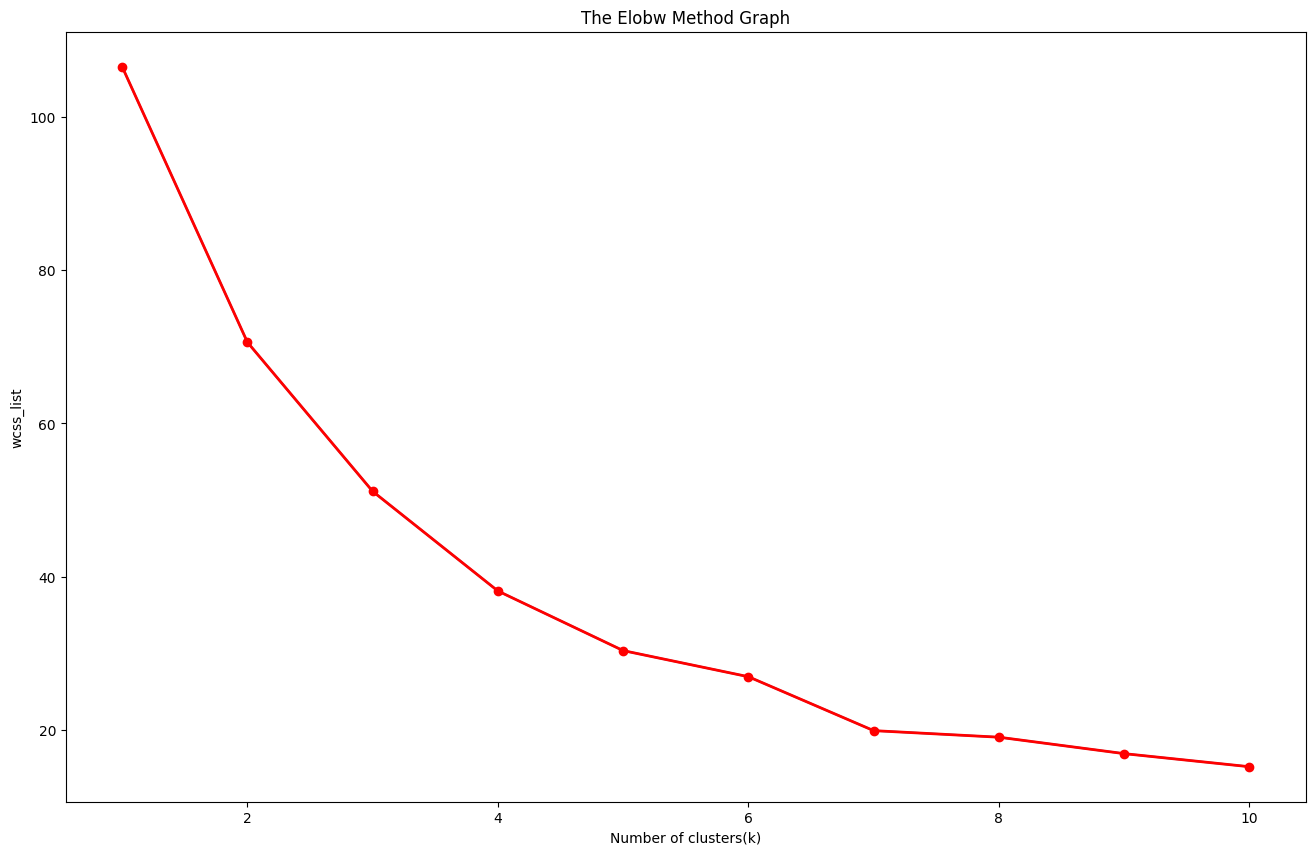

In [289]:
# plot for sum of squared distance for each number of cluster
plt.plot(range(1, 11), wcss_list)
plt.plot(range(1,11),wcss_list, linewidth=2, color="red", marker ="o")  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

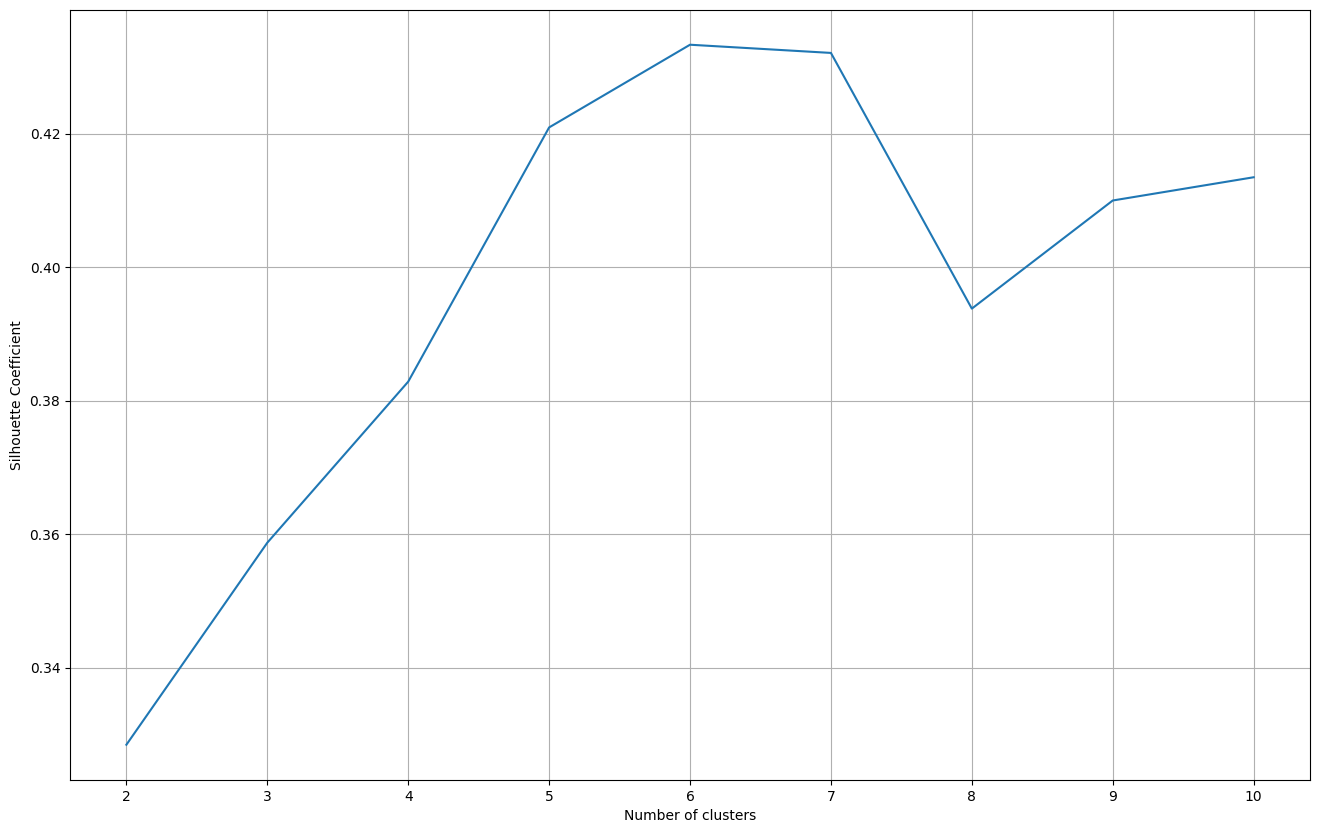

In [290]:
# silhoutte score to find optimal number of scores
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid

silhouette_avg =[]
 # Calculate average silhouette score for each number of clusters (2 to 10)

for k in range(2,11):
  km = KMeans(n_clusters=k, random_state=3)
  km.fit(df_pca)
  silhouette_avg.append(silhouette_score(df_pca, km.labels_))
     
# plot the results
plt.plot(range(2,11), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

#### 2. Cross- Validation & Hyperparameter Tuning

For n_clusters = 2 The average silhouette_score is : 0.23546240928414597
For n_clusters = 3 The average silhouette_score is : 0.3604051179159432
For n_clusters = 4 The average silhouette_score is : 0.3976878486140871
For n_clusters = 5 The average silhouette_score is : 0.41486861453685875
For n_clusters = 6 The average silhouette_score is : 0.4182149577645244


'  for i, c in enumerate(centers):\n      ax2.scatter(c[0], c[1], marker=\'\' %i, alpha=1,\n                    s=50, edgecolor=\'k\')\n\n    ax2.set_title("The visualization of the clustered data.")\n    ax2.set_xlabel("Feature space for the 1st feature")\n    ax2.set_ylabel("Feature space for the 2nd feature")\n    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "\n                  "with n_clusters = %d" % n_clusters),\n                 fontsize=14, fontweight=\'bold\')\n'

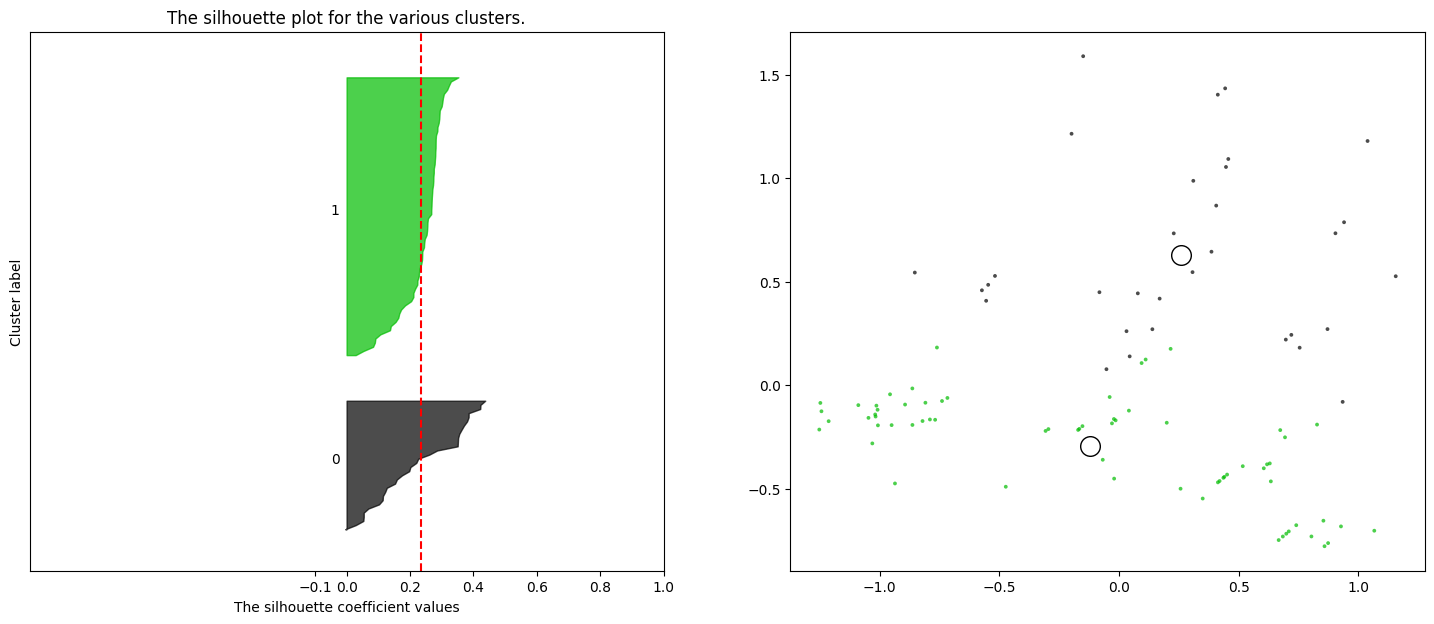

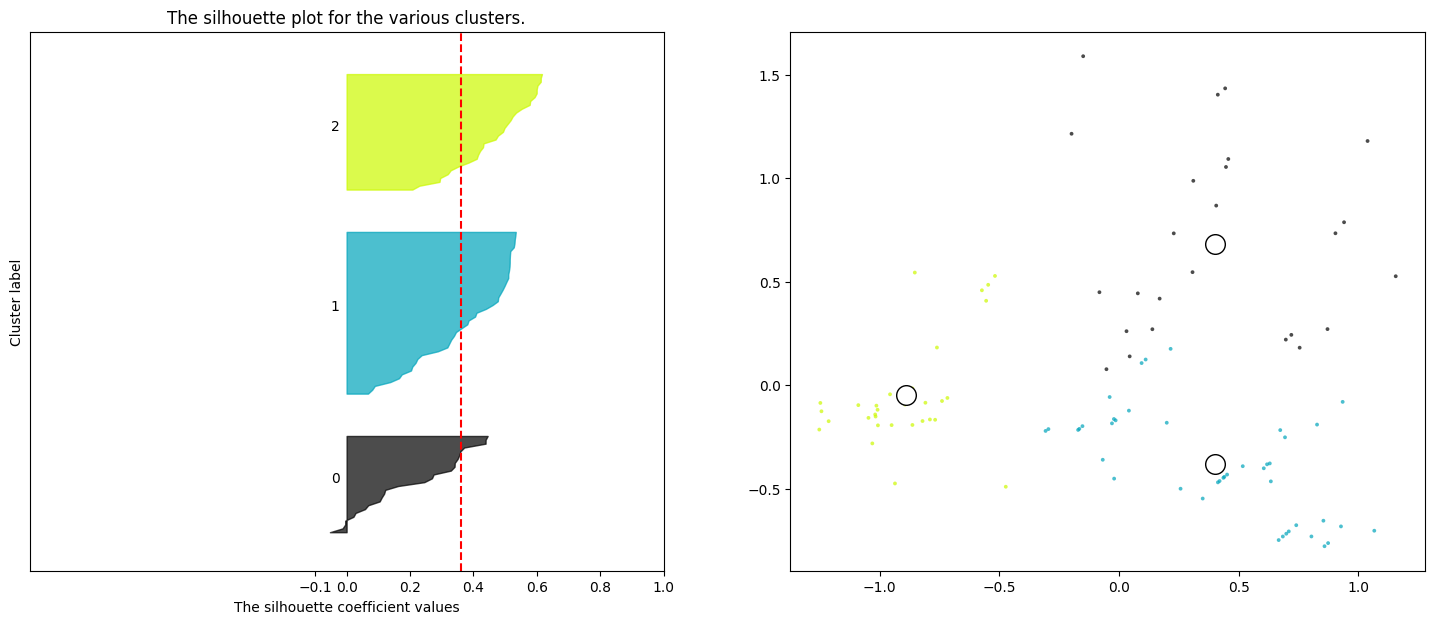

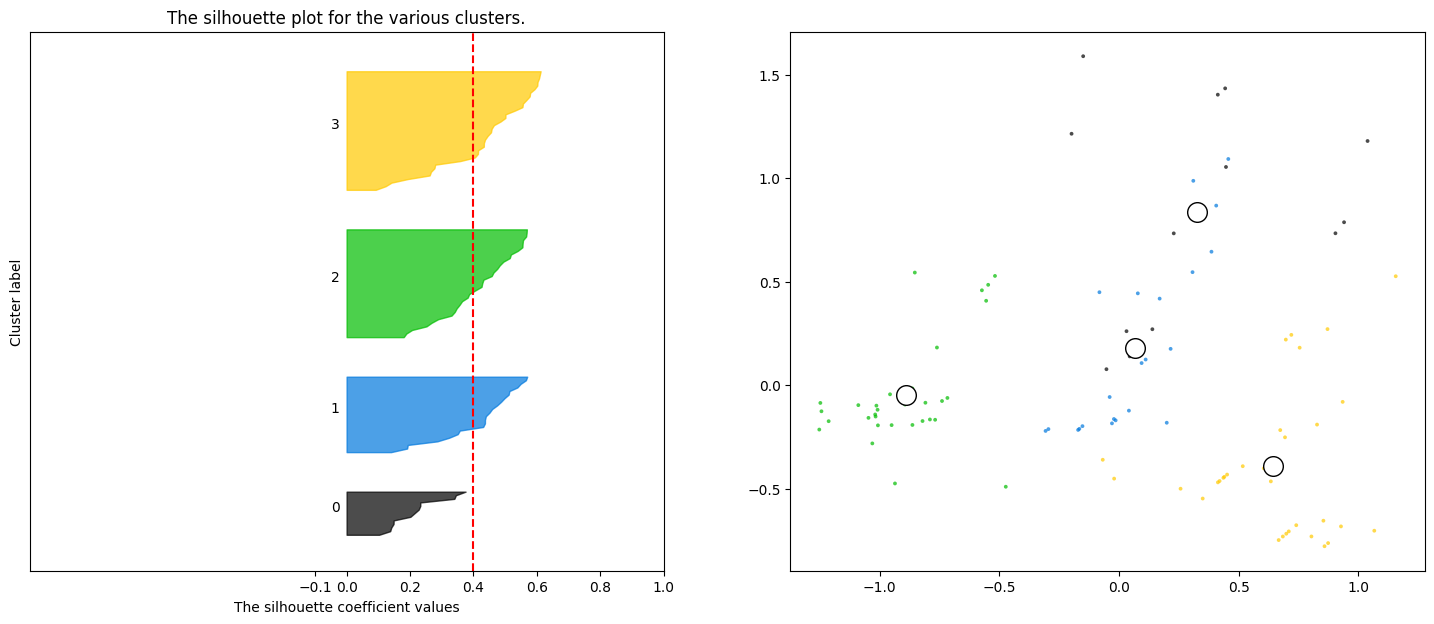

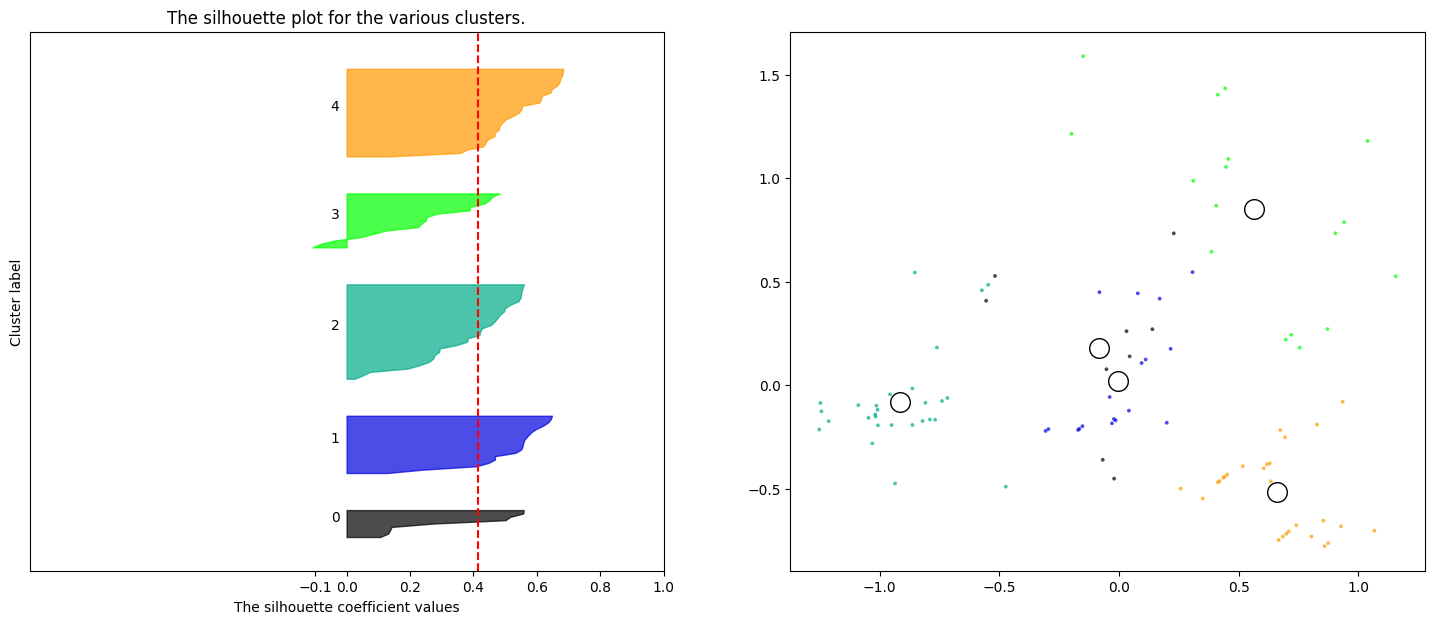

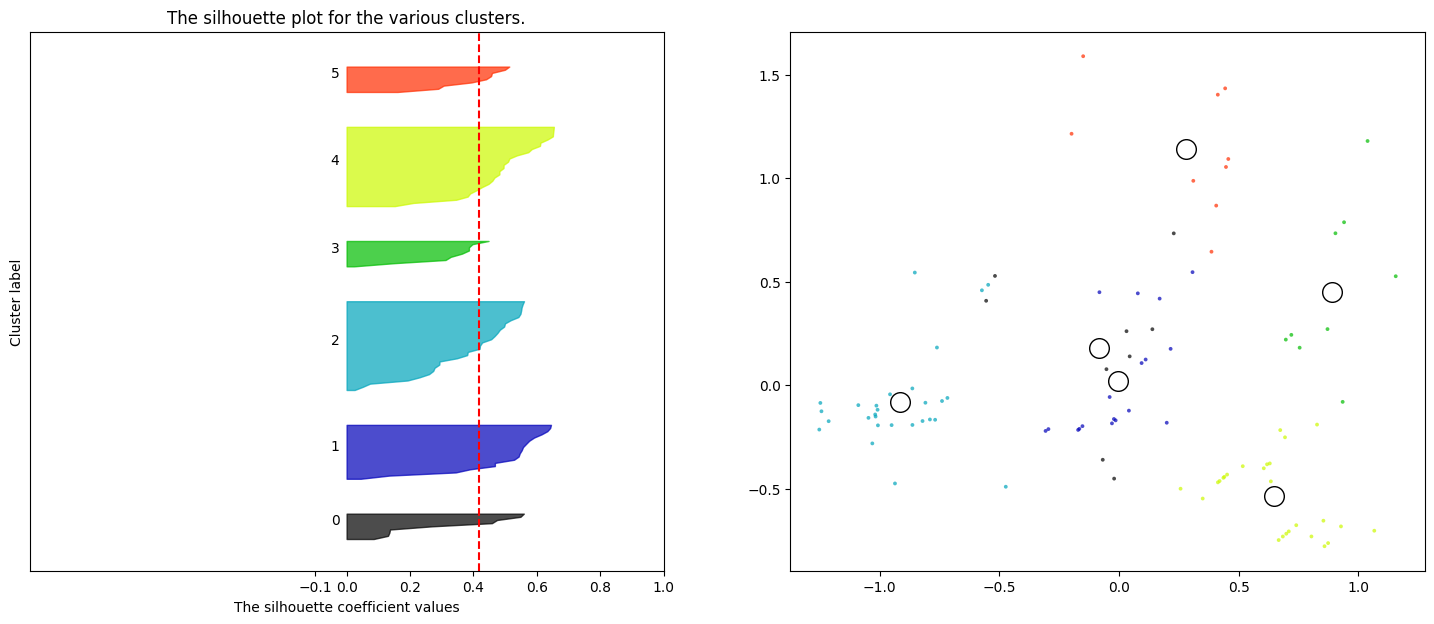

In [291]:
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
#visualizing Silhouette Score for individual clusters and the clusters made
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower =  y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

'''  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='' %i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
'''

In [292]:
#fitting on 4 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state= 10)  
y_predict= kmeans.fit_predict(df_pca) 

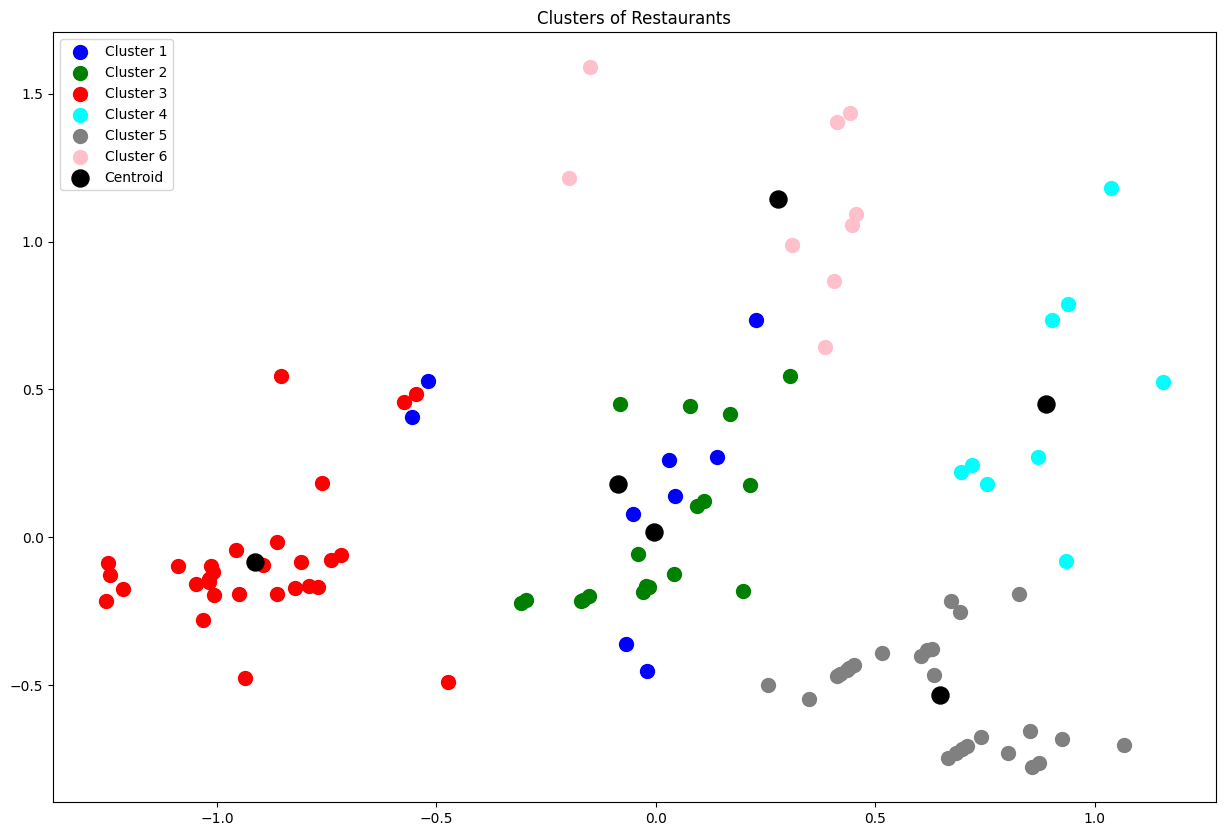

In [293]:
#visulaizing the clusters  
plt.figure(figsize=(15,10))
plt.scatter(df_pca[y_predict == 0, 0], df_pca[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(df_pca[y_predict == 1, 0], df_pca[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(df_pca[y_predict== 2, 0], df_pca[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(df_pca[y_predict == 3, 0], df_pca[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(df_pca[y_predict == 4, 0], df_pca[y_predict == 4, 1], s = 100, c = 'grey', label = 'Cluster 5') #for first cluster  
plt.scatter(df_pca[y_predict == 5, 0], df_pca[y_predict == 5, 1], s = 100, c = 'pink', label = 'Cluster 6') #for second cluster  
'''plt.scatter(df_pca[y_predict== 6, 0], df_pca[y_predict == 6, 1], s = 100, c = 'magenta', label = 'Cluster 7') #for third cluster  
plt.scatter(df_pca[y_predict == 7, 0], df_pca[y_predict == 7, 1], s = 100, c = 'orange', label = 'Cluster 8') #for fourth cluster  

'''
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroid')   
plt.title('Clusters of Restaurants')  
plt.legend()  
plt.show() 

In [294]:
# Assigning clusters to our data
new_df_cluster = cluster_df.copy()
cluster_df['clusters'] = y_predict
# checking how it is working
cluster_df.head()

Restaurant  \
0               10 Downing Street   
1                        13 Dhaba   
2  3B's - Buddies, Bar & Barbecue   
3       AB's - Absolute Barbecues   
4               Absolute Sizzlers   

                                               Links      Cost  No_of_cuisine  \
0  https://www.zomato.com/hyderabad/10-downing-st...  8.648397              9   
1  https://www.zomato.com/hyderabad/13-dhaba-gach...  6.111467              1   
2  https://www.zomato.com/hyderabad/3bs-buddies-b...  8.101981              9   
3  https://www.zomato.com/hyderabad/abs-absolute-...  8.412055              9   
4  https://www.zomato.com/hyderabad/absolute-sizz...  7.719130              9   

   Avg_rating  Cuisines_American  Cuisines_Andhra  Cuisines_Arabian  \
0       11.40                  0                0                 0   
1        3.48                  0                0                 0   
2       14.28                  0                0                 0   
3       14.64                  0                0                 0   
4       10.86                  1                0                 0   

   Cuisines_Asian  Cuisines_BBQ  ...  Cuisines_Pizza  Cuisines_Salad  \
0               0             0  ...               0               0   
1               0             0  ...               0               0   
2               0             0  ...               0               0   
3               0             0  ...               0               0   
4               0             0  ...               0               0   

   Cuisines_Seafood  Cuisines_South Indian  Cuisines_Spanish  \
0                 0                      0                 0   
1                 0                      0                 0   
2                 0                      0                 0   
3                 0                      0                 0   
4                 0                      0                 0   

   Cuisines_Street Food  Cuisines_Sushi  Cuisines_Thai  Cuisines_Wraps  \
0                     0               0              0               0   
1                     0               0              0               0   
2                     0               0              0               0   
3                     0               0              0               0   
4                     0               0              0               0   

   clusters  
0         3  
1         1  
2         1  
3         1  
4         0  

[5 rows x 48 columns]

In [295]:
# let's find the count of each of 4 clusters
cluster_df['clusters'].value_counts()

clusters
2    29
4    26
1    18
3     9
0     9
5     9
Name: count, dtype: int64

In [297]:
#creating new df for checkign cuisine in each cluster
new_cluster_df = zomato_df.copy()
new_cluster_df['clusters'] = y_predict
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')

#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

Restaurant  Cost       Cuisines  \
93               Zing's Northeast Kitchen   550          Momos   
49                          Mathura Vilas   500   South Indian   
34  Mazzo - Marriott Executive Apartments  1700   South Indian   
56       Feast - Sheraton Hyderabad Hotel  2250  Modern Indian   
88                         Domino's Pizza   400      Fast Food   

                                              Timings  No_of_cuisine  \
93                    11:30 AM to 4 PM, 7 PM to 11 PM              2   
49           11:30 AM to 3:30 PM, 6:45 PM to 11:30 PM              3   
34                        6am to 12midnight (Mon-Sun)              4   
56  6:30am to 10:30am, 12:30pm to 3pm, 7pm to 11pm...              4   
88                                     11 AM to 11 PM              2   

    Avg_rating  clusters  
93        3.65         4  
49        2.82         2  
34        4.19         5  
56        4.22         4  
88        3.09         1

In [298]:
new_cluster_df.shape

(301, 7)

In [299]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['clusters'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["clusters"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 3 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'American' 'Italian' 'Asian' 'Momos' 'Thai' 'Sushi' 'Cafe' 'Fast Food'
 'Beverages' 'Biryani'] 

Cuisine List for Cluster : 1 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'Seafood' 'Beverages' 'Italian' 'Finger Food' 'Japanese' 'Salad' 'Sushi'
 'Arabian' 'Continental' 'Fast Food' 'BBQ' 'Modern Indian' 'Bakery'
 'Pizza' 'Hyderabadi' 'Mughlai'] 

Cuisine List for Cluster : 0 

['Asian' 'Continental' 'North Indian' 'Chinese' 'Mediterranean' 'European'
 'Mughlai' 'Biryani' 'Finger Food' 'Kebab' 'Italian' 'Salad' 'American'
 'Fast Food' 'Burger' 'Sushi'] 

Cuisine List for Cluster : 4 

['Seafood' 'Goan' 'North Indian' 'Continental' 'Asian' 'Ice Cream'
 'Desserts' 'American' 'Chinese' 'Burger' 'Fast Food' 'Mexican' 'Italian'
 'Salad' 'Cafe' 'European' 'Spanish' 'Bakery' 'Wraps' 'Biryani' 'Andhra'
 'Modern Indian' 'Japanese' 'Sushi' 'Mughlai' 'Hyderabadi' 'So

In [300]:
import plotly.express as px

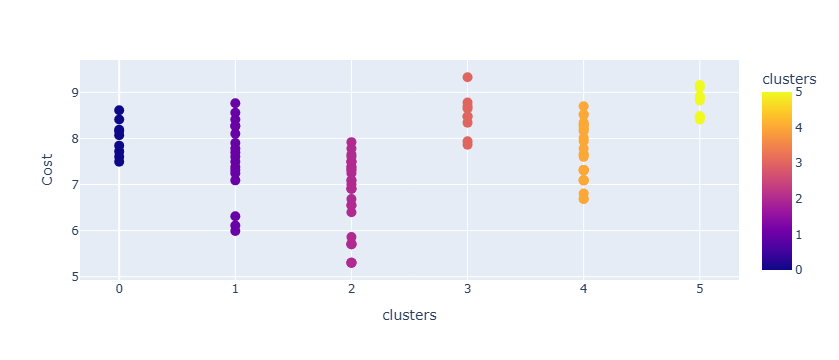

In [301]:
# clusters with cost
fig = px.scatter(cluster_df, y="Cost", x="clusters",color="clusters")
fig.update_traces(marker_size=10)
fig.show()
plt.show()

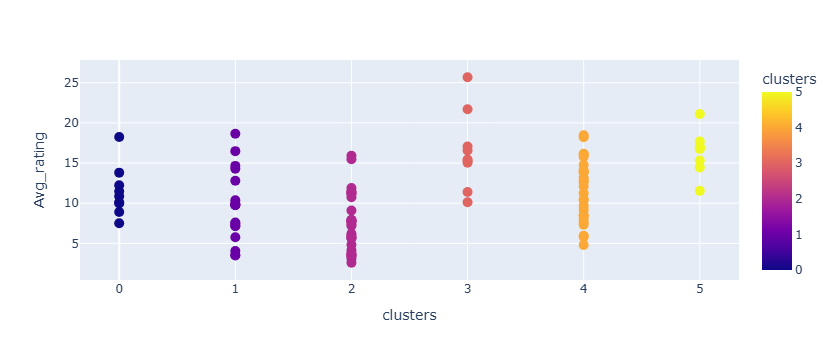

In [303]:
import plotly.express as px
import matplotlib.pyplot as plt

# Fixed column name
fig = px.scatter(cluster_df, y="Avg_rating", x="clusters", color="clusters")
fig.update_traces(marker_size=10)
fig.show()
# Remove plt.show() - not needed with Plotly


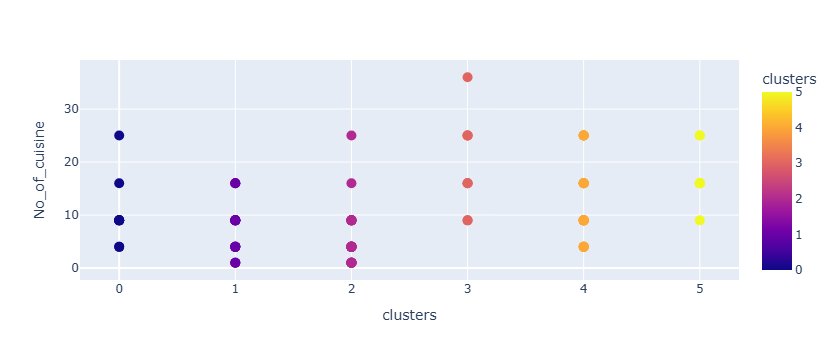

In [304]:
# clusters with no of cuisines
fig = px.scatter(cluster_df, y="No_of_cuisine", x="clusters",color="clusters")
fig.update_traces(marker_size=10)
fig.show()
plt.show()
     

In [239]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

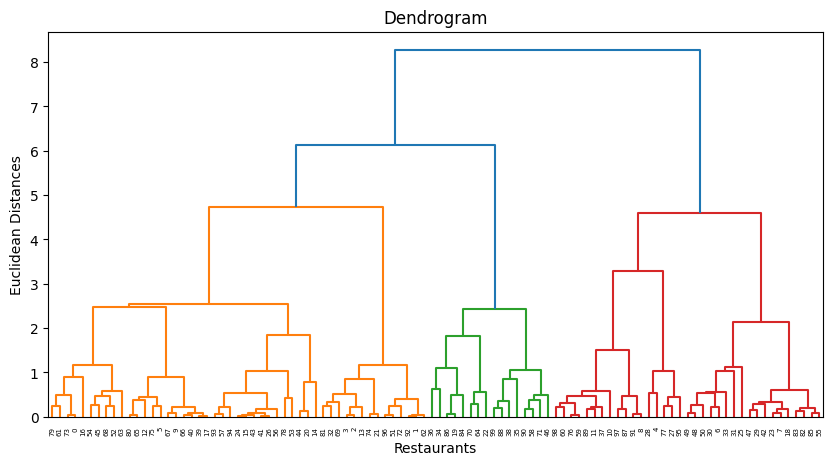

In [305]:
# Visualizing evaluation Metric Score chart
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [307]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

range_n_clusters = [2,3,4,5,6,7,8]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print(f"For n_clusters = {n_clusters}, silhouette score = {score:.4f}")


For n_clusters = 2, silhouette score = 0.3325
For n_clusters = 3, silhouette score = 0.3517
For n_clusters = 4, silhouette score = 0.3389
For n_clusters = 5, silhouette score = 0.3845
For n_clusters = 6, silhouette score = 0.4001
For n_clusters = 7, silhouette score = 0.3623
For n_clusters = 8, silhouette score = 0.3957


In [309]:
from sklearn.cluster import AgglomerativeClustering

# Fixed code
model = AgglomerativeClustering(n_clusters=6, metric="euclidean", linkage='ward')
y_predict = model.fit_predict(df_pca)


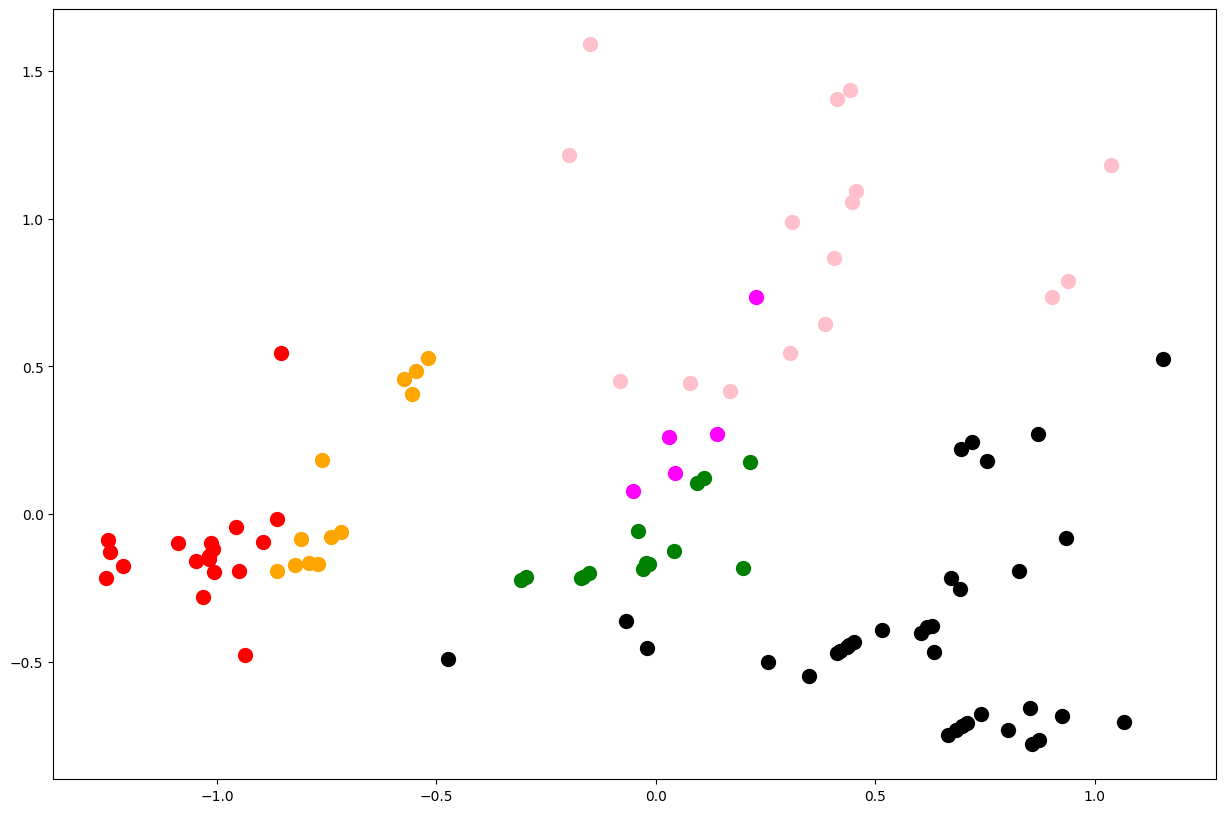

In [312]:
# visualize the clusters
plt.figure(figsize=(15,10))
plt.scatter(df_pca[y_predict == 0,0], df_pca[y_predict == 0,1], s=100, c='black')
plt.scatter(df_pca[y_predict == 1,0], df_pca[y_predict == 1,1], s=100, c='red')
plt.scatter(df_pca[y_predict == 2,0], df_pca[y_predict == 2,1], s=100, c='pink')
plt.scatter(df_pca[y_predict == 3,0], df_pca[y_predict == 3,1], s=100, c='green')
plt.scatter(df_pca[y_predict == 4,0], df_pca[y_predict == 4,1], s=100, c='orange')
plt.scatter(df_pca[y_predict == 5,0], df_pca[y_predict == 5,1], s=100, c='magenta')


In [313]:
cluster_df['cluster_hr'] = y_predict

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

### DBSCAN

In [314]:
# ML Model 
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)

#fitting on model
model = dbscan.fit(df_pca)

#find out the labels
labels = model.labels_


In [315]:
#calculating no of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

6

In [316]:
#find the silhoutte score
from sklearn import metrics
print(metrics.silhouette_score(df_pca,labels))

0.3381395778678488


In [317]:
# predict thr clusters or labels and append in cluster df
yhat = model.fit_predict(df_pca)
cluster_df["Label_DBscan"] = yhat
cluster_df['Label_DBscan'].unique()

array([ 0,  1,  4,  2, -1,  3,  5])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [243]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [244]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

### SENTIMENTAL ANALYSIS

In [319]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 2.7 MB/s eta 0:00:27
    --------------------------------------- 1.3/72.0 MB 2.8 MB/s eta 0:00:26
   - -------------------------------------- 2.1/72.0 MB 2.8 MB/s eta 0:00:26
   - -------------------------------------- 2.9/72.0 MB 3.2 MB/s eta 0:00:22
   -- ------------------------------------- 3.9/72.0 MB 3.4 MB/s eta 0:00:20
   --- ------------------------------------ 5.5/72.0 MB 4.1 MB/s eta 0:00:17
   --- ------------------------------------ 7.1/72.0 MB 4.6 MB/s eta 0:00:15
   ----- ---------------------------------- 9.2/72.0 MB 5.2 MB/s eta 0:00:13
   ------ --------------------------------- 11.8/72.0 MB 6.0 MB/s eta 0:00:11
   -------- ------------------------------- 14.9/72.0 MB 6.9 MB/s eta 0:00:09
   -------

In [320]:
#Importing all the required libraries for sentiment analysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, roc_curve

In [321]:
# List of models
models = [["LogisticRegression", LogisticRegression(fit_intercept = True, class_weight='balanced')], ["DecisionTree", DecisionTreeClassifier()],
          ["RandomForest",RandomForestClassifier()],["XGBoost", XGBClassifier()],
          ["KNN", KNeighborsClassifier()]]

In [322]:
#function for fitting the model and calculating scores

def model_build(models,X_train,X_test,y_train,y_test):
  """
  This function builds the classification models using the traing and testing datas passed as arguments
  and returns the respective model metrics, confusion matrices and the roc curve values.
  Paramaters:
  X_train, X_test, y_train and y_test as pandas dataframe or numpy ndarray
  models: A list with model name and the model class. 
  """
  score_matrix = pd.DataFrame()
  # dictionary for roc curve
  roc_sc = {}

  for model_name,model in models:
    current_result = dict()
    
    model.fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    ypredProb = model.predict_proba(X_test)
    
    # Model metrics 
    current_result["Model"] = model_name
    
    #Accuracy    
    current_result["Train Accuracy"] = accuracy_score(y_train,y_pred_train)
    current_result["Test Accuracy"] = accuracy_score(y_test,y_pred_test)
    
    #Precision
    current_result["Test Precision"] = precision_score(y_test,y_pred_test)
    
    # Recall
    current_result["Test Recall"] = recall_score(y_test, y_pred_test)
    
    #f1 score
    current_result["Test F1"] = f1_score(y_test, y_pred_test)
    
    #AUC_ROC curve
    current_result["Test ROC_AUC Score"] = roc_auc_score(y_test,y_pred_test)
    current_result = pd.DataFrame(current_result,index=[1])
    
    #appending in score_matrix
    score_matrix = score_matrix.append(current_result)

    # ROC roc_curve values
    fpr, tpr, threshold = roc_curve(y_test, ypredProb[:,1])
    
    roc_sc[model_name] = (fpr,tpr)

  # roc curve for tpr = fpr 
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
  roc_sc["TPR = FPR"] = (p_fpr, p_tpr)
  return score_matrix , roc_sc

In [324]:
# Obtaining results
def model_build(models, X_train, X_test, y_train, y_test):
    score_matrix = pd.DataFrame()  # Initialize empty
    
    for model_name, model in models.items():
        # ... your existing training code ...
        
        current_result = pd.DataFrame(current_result, index=[0])  # Note: index=[0]
        
        # FIXED LINE:
        score_matrix = pd.concat([score_matrix, current_result], ignore_index=True)
    
    return score_matrix, Curve  # or whatever Curve contains


In [329]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [330]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','liblinear'],
    }
]

In [331]:
grid_lr = GridSearchCV( LogisticRegression(fit_intercept = True, class_weight='balanced'), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = grid_lr.fit(X_train,y_train)

# Get the results
print(grid_lr.best_score_)
print(grid_lr.best_estimator_)
print(grid_lr.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
0.660956955078443
LogisticRegression(C=100, class_weight='balanced', penalty='l2')
{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [332]:
final_model = LogisticRegression(random_state=42, solver='lbfgs', penalty= 'l2', C = 10 )
final_model.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l2', random_state=42)

In [333]:
# prediction report
y_pred = final_model.predict(X_test)
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.6070    0.3726    0.4618       883
           1     0.7158    0.8675    0.7844      1608

    accuracy                         0.6921      2491
   macro avg     0.6614    0.6201    0.6231      2491
weighted avg     0.6772    0.6921    0.6700      2491



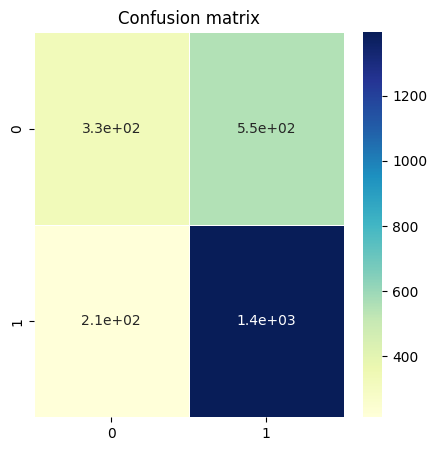

In [334]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.show()
     

### RESULTS

After the hyperparameter tuning of Logistic Regression we observed the following improvements in the evaluation metrics.

Accuracy Before: 85.09% || Accuracy After: 86.00%

Precision Before: 90.54% || Precision After:85.89 %

Recall Before: 85.28% || Recall After: 86.00%

F1 Score Before: 87.84%|| F1 Score After: 85.89%

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [342]:

# Save the File For Clustering 
import pickle
pickle.dump(kmeans, open('model_save','wb'))

In [343]:
# Save the File For Sentiment Analysis
import pickle
pickle.dump(final_model, open('model_save1','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [347]:
# Load the File and predict unseen data.
# Save model first
model = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
model.fit(scaled_df)
with open('zomato_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load & predict
model = pickle.load(open('zomato_model.pkl', 'rb'))
print(model.fit_predict(df_pca[50:101]))


[5 3 1 1 1 5 1 1 0 2 2 0 3 0 0 1 1 1 1 3 0 0 3 0 3 1 2 4 1 0 1 3 5 5 0 5 0
 2 0 2 0 2 3 1 1 4 3 2 2 0]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***